In [1]:
import numpy as np
import matplotlib.pyplot as plt
import block
import mdtraj as md
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.optimize import curve_fit
import pickle5 as pickle
import pandas as pd

In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#ECEC28','#B15928']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,12))

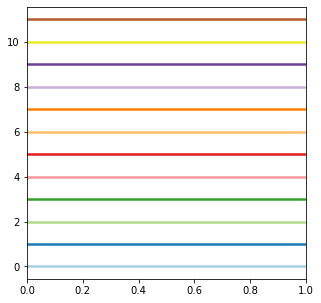

In [3]:
#Test colormap
fig = plt.figure(figsize=(5,5))

for i,color in enumerate(colors):
    plt.axhline(i, color=colors[i], linewidth=2.5)

In [4]:
proteins = ['K25', 'A1', 'CoRNID', 'ColNT', 'FhuA', 'Hst52', 'K19', 'PNt', 'Sic1', 'aSyn', 'Hst5', 'ACTR']

PRE_proteins = ['FUS', 'A2', 'OPN', 'aSyn_PRE', 'htau40']
lambdas = ['1.00', '1.04', '1.06', '1.08', '1.10', '1.12', '1.14']
lambdas_float = [1.0, 1.04, 1.06, 1.08, 1.10, 1.12, 1.14]
PI_distance_cutoff = 1.1
errmethod='hline' #Choose b3, hline or knee_loc

#Dictionary with protein:[exp_Rg, exp_err]
exp_Rg = {'PNt': [4.96, 0.56], 'Sic1': [2.86, 0.14], 'Hst5':[1.34, 0.05], 'ACTR':[2.55, 0.27], 'K25': [4.06, 0.28], 'A1': [2.55, 0.1], 'CoRNID': [4.72, 0.12], 'ColNT':[2.82, 0.034], 'FhuA':[3.21, 0.22], 'Hst52':[1.77, 0.049], 'K19':[3.35, 0.29], 'aSyn':[3.56, 0.036]}

#Dictionary with protein lengths
nr_residues = {'PNt':334, 'Sic1':92, 'Hst5':24, 'ACTR':71, 'K25':185, 'A1':137, 'CoRNID':271, 'ColNT':98, 'FhuA':144, 'Hst52':48, 'K19':99, 'aSyn':140}

#Dictionary with simulation/experiment temperatures
temperature = {'PNt':298, 'Sic1':293, 'Hst5':293, 'ACTR':278, 'K25':288, 'A1':296, 'CoRNID':293, 'ColNT':277, 'FhuA':298, 'Hst52':298, 'K19':288, 'aSyn':293}


# Check distance to periodic image

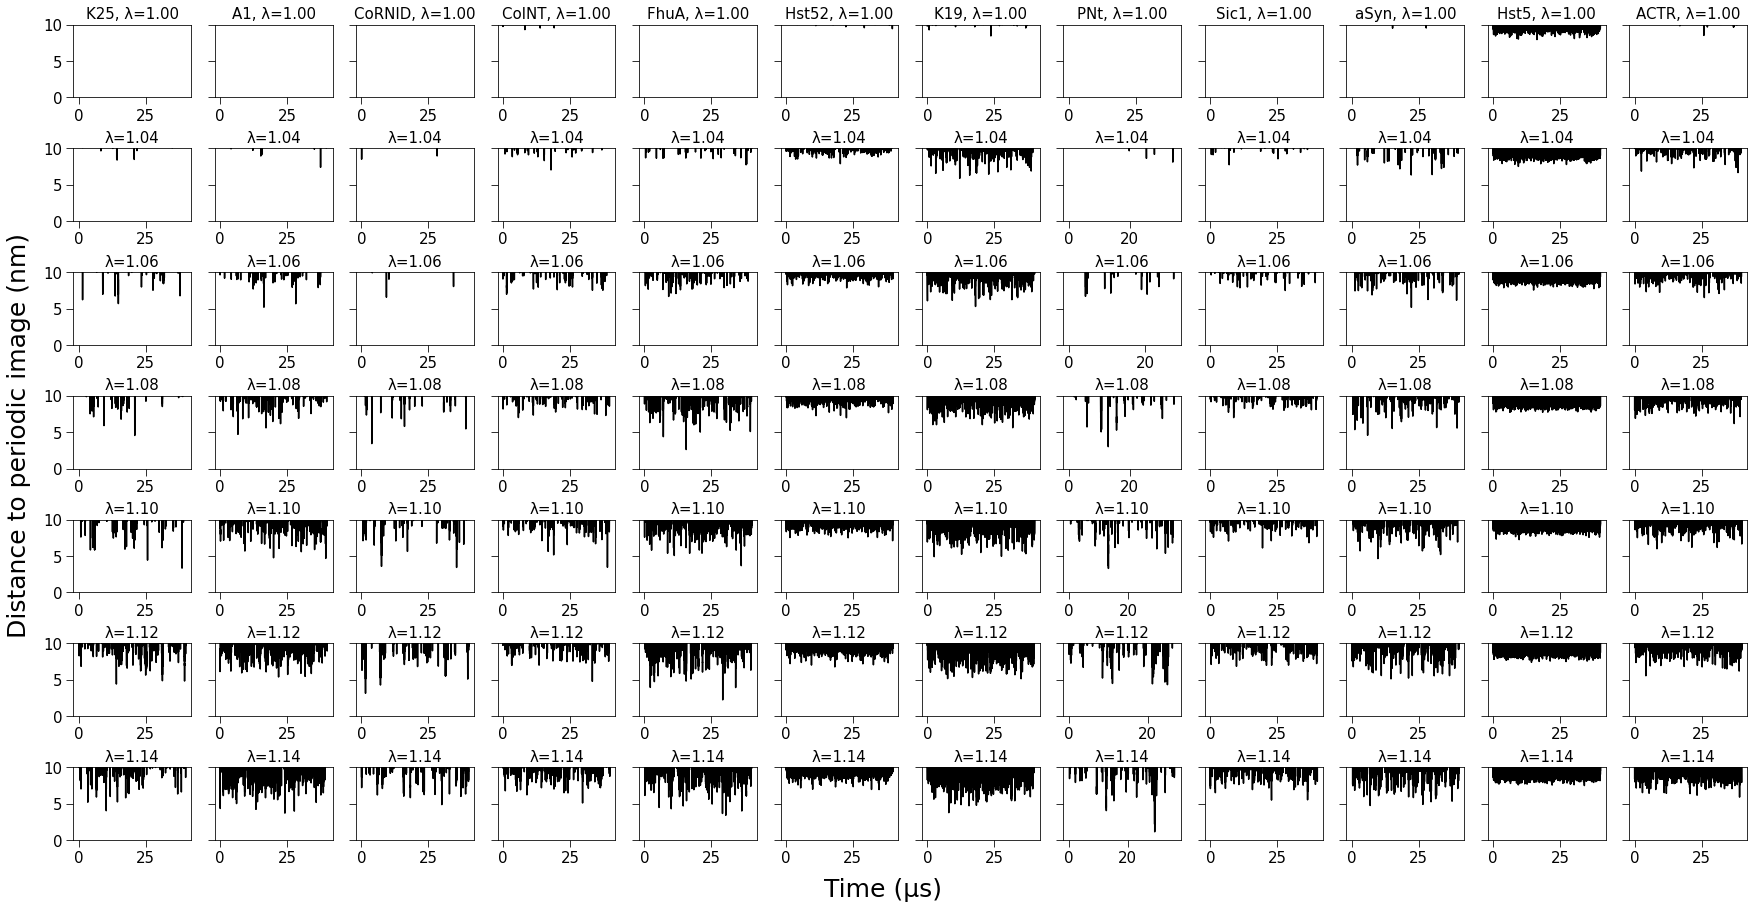

In [6]:
#Make outfile to log proteins that come too close to PI
PI_warning_outfile='PI_distance_warnings.log'
with open(PI_warning_outfile,'w') as f:
    f.write("# Simulations with distance to PI below the cut-off \n# Protein \tLambda \tShortest_dist_PI (nm) \n")

#fig, ax = plt.subplots(figsize=(30,15), nrows=len(lambdas), ncols=len(proteins), sharey='all', sharex='col')
fig, ax = plt.subplots(figsize=(30,15), nrows=len(lambdas), ncols=len(proteins), sharey='all')    

plt.subplots_adjust(hspace = 0.70)
fig.text(0.5, 0.09, 'Time (µs)', ha='center', va='top', fontsize=25)
fig.text(0.1, 0.5, 'Distance to periodic image (nm)', ha='center', va='center', fontsize=25, rotation=90)


n = 0
#Loop over all proteins
for protein in proteins:
    k=0
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Get distance to PI as a function of time
        time, distance = np.genfromtxt('%s/lambda_%s/pi_mindist.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=29, unpack=True)
            
        #Find shortest distance and check if it is below the acceptable distance
        minimum_distance = np.amin(distance)
        if minimum_distance <= PI_distance_cutoff:
            print("WARNING! %s with lambda %s comes within %f nm of its periodic image." % (str(protein), str(l), minimum_distance))
            #Write to outfile
            with open(PI_warning_outfile, 'a') as f:
                f.write("%s \t%s \t%f \n" % (str(protein), str(l), minimum_distance))
                
        #Plot distance to PI vs time
        ax[k,n].plot(time, distance, '-', color='black')
        if k == 0:
            ax[k,n].set_title('%s, λ=%s' % (str(protein), str(l)), fontsize=15)
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=15)
        ax[k,n].set_ylim(0,10)
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=15)
        
        k+=1
    n+=1

fig.savefig("figures/PI_distances.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/PI_distances.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Check Rg convergence

Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 20



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 4

Removing 2 at the bottom of each replica
Possible blocks transformations: 20



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 4

Removing 2 at the bottom of each replica
Possible blocks transformations: 8

Removing 3 at the bottom of each replica
Possible blocks transformations: 2

Removing 4 at the bottom of each replica
Possible blocks transformations: 24



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 2

Removing 2 at the bottom of each replica
Possible blocks transformations: 36



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 4

Removing 2 at the bottom of each replica
Possible blocks transformations: 40



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 32



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


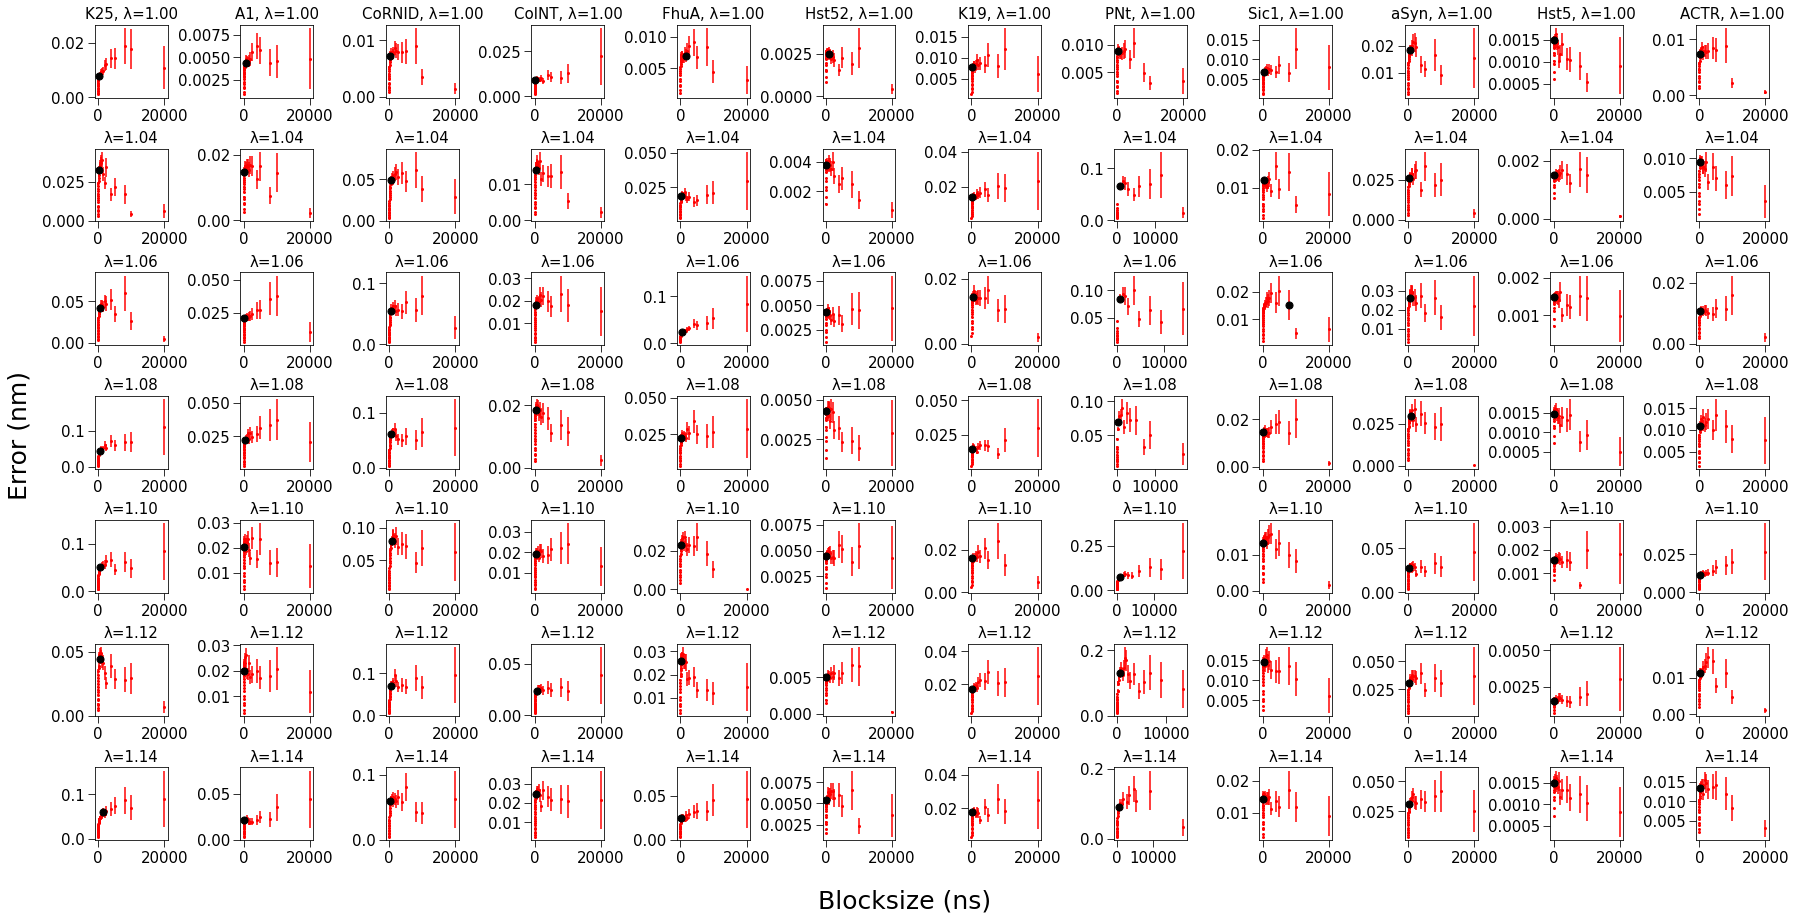

In [7]:
fig, ax = plt.subplots(figsize=(30,15), nrows=len(lambdas), ncols=len(proteins))    
plt.subplots_adjust(hspace = 0.70, wspace = 1.0)
fig.text(0.5, 0.08, 'Blocksize (ns)', ha='center', va='top', fontsize=25)
fig.text(0.09, 0.5, 'Error (nm)', ha='center', va='center', fontsize=25, rotation=90)
    
n = 0

#Loop over all proteins
for i in range(len(proteins)):
    
    k=0
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(proteins[i]), str(l)), usecols=(0,1), skip_header=27, unpack=True)
        
        #Trim Rg array for block error analysis
        Rg = block.check(Rg, multi=1)
        
        #Block error analysis
        blocks_stat = block.blocking(Rg)
        
        #Choose optimal block size and find error
        if errmethod=='b3':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="b3")
        elif errmethod=='knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
        elif errmethod=='hline':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="hline")
        
        #Plot
        ax[k,n].errorbar(blocks_stat[...,0],blocks_stat[...,1],blocks_stat[...,2],fmt='ro',ms=2)

        if k == 0:
            ax[k,n].set_title('%s, λ=%s' % (str(proteins[i]), str(l)), fontsize=15)
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=15)
        #ax[k,n].set_ylim(0,10)
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=15)
        
        ax[k,n].scatter(corr_len,err,c='k',zorder=300,s=50)
        
        k+=1
    n+=1

fig.savefig("figures/Rg_blockerror.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_blockerror.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Rg one plot

/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1

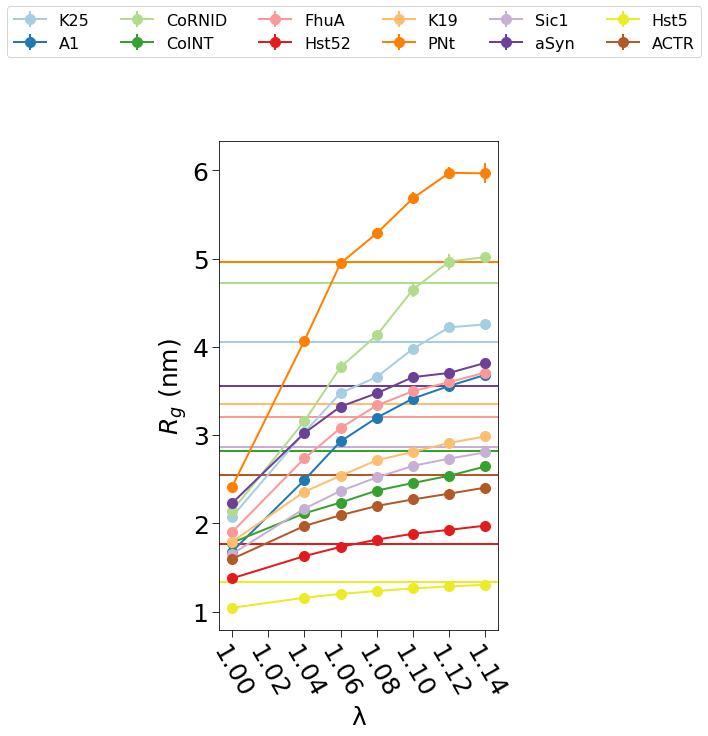

In [8]:
fig = plt.figure(figsize=(5,9))    

x_ticks = np.arange(1.00, 1.16, step=0.02)
mean_square_error = 0
chi2 = 0
lambda_mins = []
Rg_square_error_vs_protein = []
Rg_square_error_norm_vs_protein = []
Rg_chi2_vs_protein = []

#Loop over all proteins
for i,protein in enumerate(proteins):
    
    Rg_vs_lambda = []
    Rgerr_vs_lambda = []
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Load traj
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)
        Rg_avg = np.average(Rg)
        #Calculate Rg
        Rg_vs_lambda.append(Rg_avg)
        
        #Block error analysis
        blocks_stat = block.blocking(Rg)
        if errmethod != 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
        elif errmethod == 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
            
        Rgerr_vs_lambda.append(err)
    
    #Calculate square-error of each Rg to experimental, find minimum distance and get corresponding lambda value
    Rg_vs_lambda = np.array(Rg_vs_lambda)
    Rg_square_error = np.square(Rg_vs_lambda-exp_Rg[protein][0])
    Rg_square_error_norm = Rg_square_error/exp_Rg[protein][0]
    Rg_chi2 = np.square((Rg_vs_lambda-exp_Rg[protein][0])/exp_Rg[protein][1])
    
    lambda_mins.append(lambdas_float[np.argmin(Rg_square_error)])
    Rg_square_error_vs_protein.append(Rg_square_error)
    Rg_chi2_vs_protein.append(Rg_chi2)
    Rg_square_error_norm_vs_protein.append(Rg_square_error_norm)
    
    #Add square_error vs lambda to running sum for averaging
    mean_square_error += Rg_square_error
    chi2 += Rg_chi2
    
    plt.errorbar(lambdas_float, Rg_vs_lambda, yerr=Rgerr_vs_lambda, fmt='-o', linewidth=2, markersize=10, color=colors[i], label=protein)
    plt.axhline(exp_Rg[protein][0], linewidth=2, color=colors[i])
    
fig.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=6)

plt.xticks(x_ticks)
plt.xlabel('λ', fontsize=25)
plt.ylabel('$\it{R}$$_g$ (nm)', fontsize=25)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)

#Calculate mean-square-error over all proteins for each lambda
mean_square_error=mean_square_error/len(proteins)
chi2=chi2/len(proteins)

fig.savefig("figures/Rg_vs_lambda_oneplot.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_vs_lambda_oneplot.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# SAXS chi2

In [9]:
## Chi2 to SAXS

#Load chi2 pickle
with open('martini3saxs_idp.pkl', "rb") as f:
    SAXSchi2_vs_proteins = pickle.load(f)

1.00    22.844110
1.04     7.608924
1.06     4.906636
1.08     3.139996
1.10     2.322476
1.12     1.737134
1.14     1.331219
dtype: float64
1.00    62.795600
1.04    17.668703
1.06     9.555518
1.08     6.081976
1.10     4.487803
1.12     3.828619
1.14     3.635960
dtype: float64


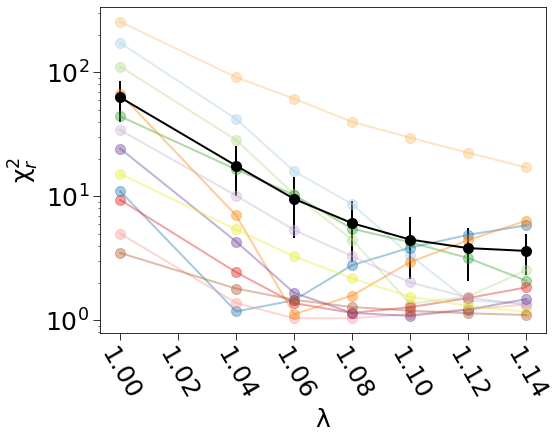

In [10]:
#Set x-ticks
x_ticks = np.arange(1.00, 1.16, step=0.02)

SAXSchi2_average = SAXSchi2_vs_proteins.mean(axis=1)
SAXSchi2_err = SAXSchi2_vs_proteins.sem(axis=1)

print(SAXSchi2_err)
print(SAXSchi2_average)

#Start plot
fig = plt.figure(figsize=(8,6))
plt.xlabel('λ', fontsize=25)
plt.ylabel('χ$^{2}_r$', fontsize=25)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)
plt.xticks(x_ticks)
plt.yscale('log')

#Loop through proteins and plot
for i,protein in enumerate(proteins):
    plt.plot(lambdas_float, SAXSchi2_vs_proteins[protein], '-o', linewidth=2, markersize=10, color=colors[i], alpha=0.4, label=protein)

plt.errorbar(lambdas_float, SAXSchi2_average, yerr=SAXSchi2_err, fmt='-o', linewidth=2, markersize=10, color='black')

fig.savefig("figures/SAXS_Chi2_vs_lambda_oneplot.png", bbox_inches='tight', pad_inches=1, dpi=300)
fig.savefig("figures/SAXS_Chi2_vs_lambda_oneplot.pdf", bbox_inches='tight', pad_inches=1, dpi=300)

In [11]:
#Get lambda values that give minimum chi2 to SAXS
lambda_mins_chi2 = []
for i,protein in enumerate(proteins):
    lambda_mins_chi2.append(lambdas_float[np.argmin(SAXSchi2_vs_proteins[protein])])

In [12]:
#Find a range of minimum lambda values within a cutoff lambdamin+(lambdamax-lambdamin)*percent_threshold
chi2_percent_threshold=0.02

lambda_mins_chi2range = []
for i,protein in enumerate(proteins):
    chi2_cutoff = np.amin(SAXSchi2_vs_proteins[protein])+(np.amax(SAXSchi2_vs_proteins[protein])-np.amin(SAXSchi2_vs_proteins[protein]))*chi2_percent_threshold
    lambdas_under_cutoff = []
    for lambda_index in np.where(SAXSchi2_vs_proteins[protein]<=chi2_cutoff)[0]:
        lambdas_under_cutoff.append(lambdas_float[lambda_index])
    lambda_mins_chi2range.append(lambdas_under_cutoff)

# Optimal lambda and compaction

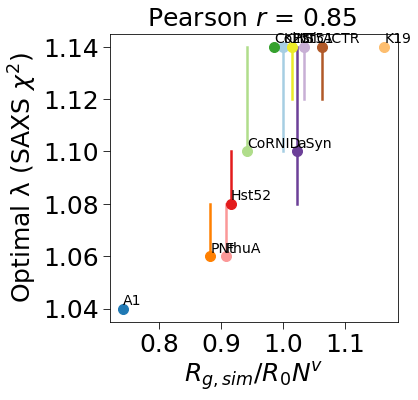

In [13]:
fig= plt.figure(figsize=(4,4))
axes= fig.add_axes([1,1,1,1])

plt.xlabel('$\it{R}$$_{g, sim}$/$\it{R}$$_{0}$$\it{N}$$^{v}$', fontsize=25)
plt.ylabel('Optimal λ (SAXS $\chi^2$)', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25) 
plt.tick_params(colors='black', direction='out', length=7)

Rg_lengthnorm_vs_protein = []
for i,protein in enumerate(proteins):
    Rg_lengthnorm = exp_Rg[protein][0]/(0.23*nr_residues[protein]**0.55)
    
    #Plot data point
    plt.plot(Rg_lengthnorm, lambda_mins_chi2[i], 'o', color=colors[i], markersize=10, label=str(protein))
    plt.plot((Rg_lengthnorm,Rg_lengthnorm),(np.amin(lambda_mins_chi2range[i]),np.amax(lambda_mins_chi2range[i])),c=colors[i],lw=2.5)

    plt.text(Rg_lengthnorm+0.0004, lambda_mins_chi2[i]+0.003, str(protein), fontsize=14, horizontalalignment='left', verticalalignment='center')
    
    Rg_lengthnorm_vs_protein.append(Rg_lengthnorm)

pearson, pval_pearson = stats.pearsonr(Rg_lengthnorm_vs_protein,lambda_mins_chi2)
spearman, pval_spearman = stats.spearmanr(Rg_lengthnorm_vs_protein,lambda_mins_chi2)

plt.text(0.95, 1.148, 'Pearson $\it{r}$ = %2.2f' % (pearson), ha='center', fontsize=25)
    
fig.savefig("figures/Rg_lengthnorm_vs_lambdaoptchi2.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_lengthnorm_vs_lambdaoptchi2.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

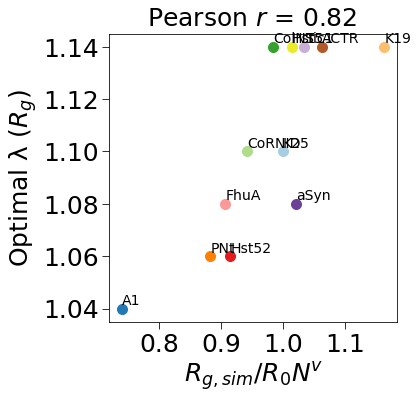

In [14]:
fig= plt.figure(figsize=(4,4))
axes= fig.add_axes([1,1,1,1])

plt.xlabel('$\it{R}$$_{g, sim}$/$\it{R}$$_{0}$$\it{N}$$^{v}$', fontsize=25)
plt.ylabel('Optimal λ ($R_g$)', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25) 
plt.tick_params(colors='black', direction='out', length=7)

Rg_lengthnorm_vs_protein = []
for i,protein in enumerate(proteins):
    Rg_lengthnorm = exp_Rg[protein][0]/(0.23*nr_residues[protein]**0.55)
    
    #Plot data point
    plt.plot(Rg_lengthnorm, lambda_mins[i], 'o', color=colors[i], markersize=10, label=str(protein))
    plt.text(Rg_lengthnorm+0.0004, lambda_mins[i]+0.003, str(protein), fontsize=14, horizontalalignment='left', verticalalignment='center')
    
    Rg_lengthnorm_vs_protein.append(Rg_lengthnorm)

pearson, pval_pearson = stats.pearsonr(Rg_lengthnorm_vs_protein,lambda_mins)
spearman, pval_spearman = stats.spearmanr(Rg_lengthnorm_vs_protein,lambda_mins)

plt.text(0.95, 1.148, 'Pearson $\it{r}$ = %2.2f' % (pearson), ha='center', fontsize=25)

    
fig.savefig("figures/Rg_lengthnorm_vs_lambdaopt.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_lengthnorm_vs_lambdaopt.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

## Plot Rg distributions

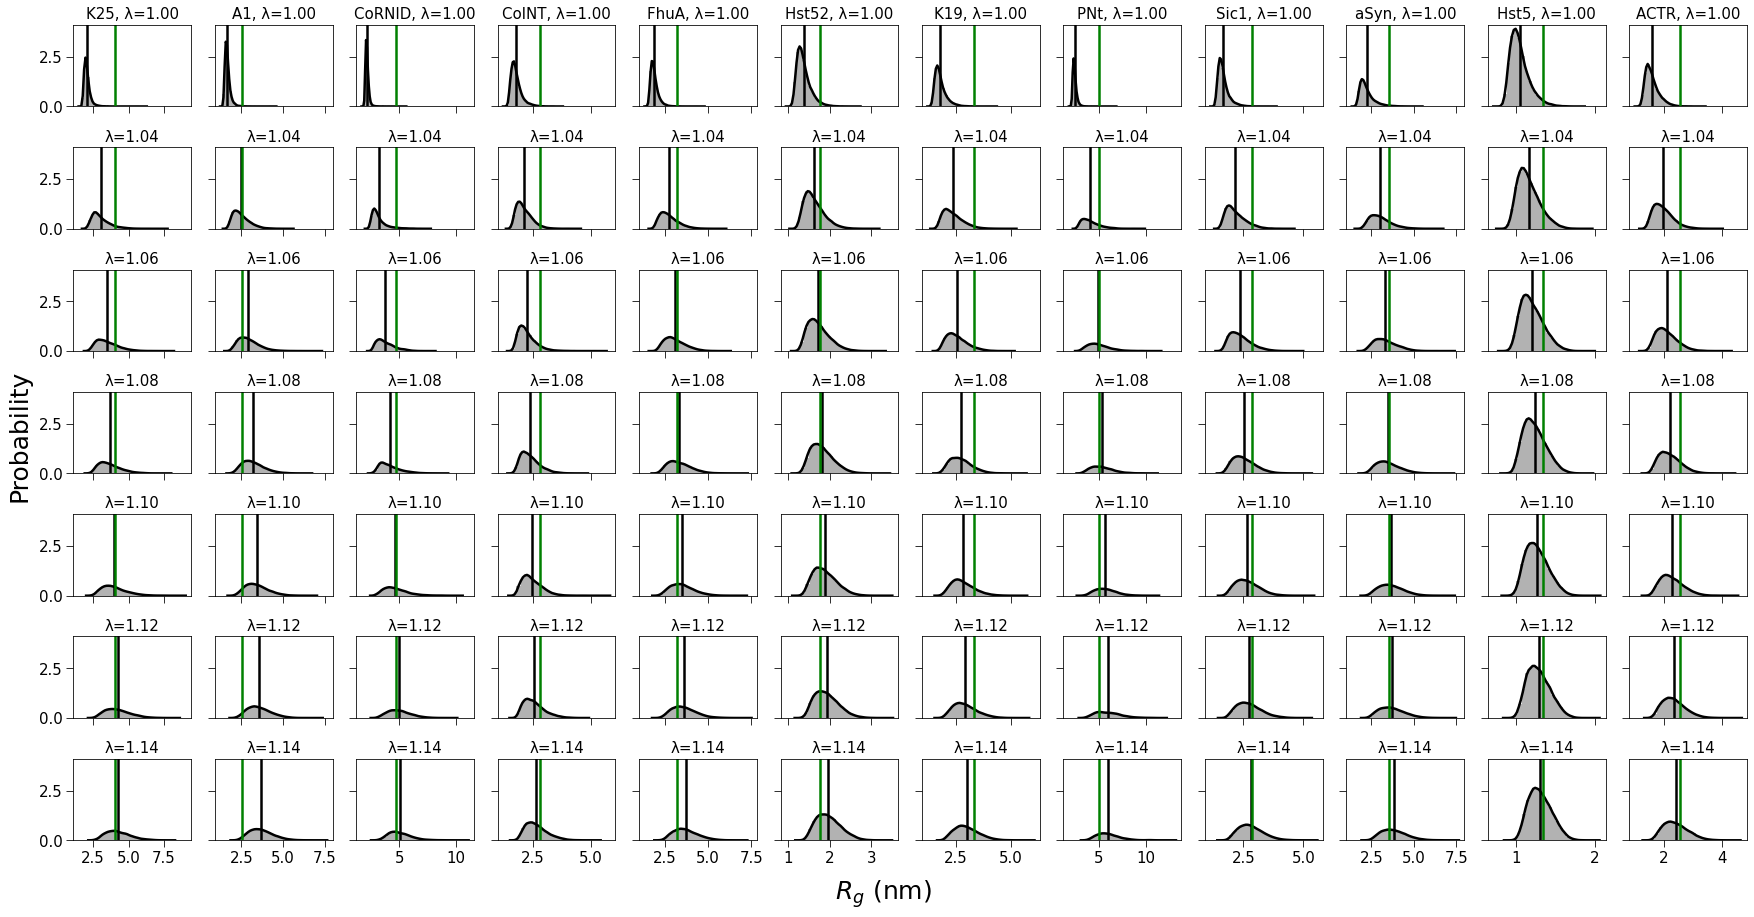

In [15]:
fig, ax = plt.subplots(figsize=(30,15), nrows=len(lambdas), ncols=len(proteins), sharey='all', sharex='col')    
plt.subplots_adjust(hspace = 0.50)
fig.text(0.5, 0.09, '$\it{R}$$_g$ (nm)', ha='center', va='top', fontsize=25)
fig.text(0.1, 0.5, 'Probability', ha='center', va='center', fontsize=25, rotation=90)

n = 0
#Loop over all proteins
for protein in proteins:
    k=0
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)
        
        kde_x = np.linspace( np.amin(Rg)*0.9, np.amax(Rg)*1.1, num = 50 )
        kde_y = stats.gaussian_kde(Rg, bw_method = "silverman").evaluate(kde_x)
        
        ax[k,n].hist(Rg, density=True, color='black', alpha=0.3, bins=20)
        ax[k,n].plot(kde_x, kde_y, '-', linewidth=2.5, color='black')
        
        ax[k,n].axvline(np.average(Rg),linewidth=2.5, alpha=1, color='black', label='Simulation average')
        ax[k,n].axvline(exp_Rg[protein][0],linewidth=2.5, alpha=1, color='green', label='Experimental')
        
        
        if k == 0:
            ax[k,n].set_title('%s, λ=%s' % (str(protein), str(l)), fontsize=15)
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=15)
        
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=15)
        k+=1
    n+=1

fig.savefig("figures/Rg_distributions.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_distributions.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Rg_exp and Rg_sim correlations

In [16]:
#Get Rgsim vs protein vs lambda arrays for each protein
#Make corresponding arrays for Rgexp and Rgexp_err
expRg_vs_protein_vs_lambda = []
expRgerr_vs_protein_vs_lambda = []
simRg_vs_protein_vs_lambda = []
simRgerr_vs_protein_vs_lambda = []

for i,l in enumerate(lambdas):

    expRg_vs_protein_vs_lambda.append([])
    expRgerr_vs_protein_vs_lambda.append([])
    simRg_vs_protein_vs_lambda.append([])
    simRgerr_vs_protein_vs_lambda.append([])

    
    for j,protein in enumerate(proteins):
        
        #Load traj
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)
        Rg_sim = (np.average(Rg))
        
        #Block error analysis
        blocks_stat = block.blocking(Rg)
        if errmethod != 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
        elif errmethod == 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
             
        #Append error to array
        expRg_vs_protein_vs_lambda[i].append(exp_Rg[proteins[j]][0])
        expRgerr_vs_protein_vs_lambda[i].append(exp_Rg[proteins[j]][1])
        simRg_vs_protein_vs_lambda[i].append(Rg_sim)
        simRgerr_vs_protein_vs_lambda[i].append(err)  

/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


In [17]:
#Linear regression of Rgsim vs Rgexp (with intercept 0)
#With error weighting in linear regression

expRg_vs_protein_vs_lambda = np.array(expRg_vs_protein_vs_lambda)
expRgerr_vs_protein_vs_lambda = np.array(expRgerr_vs_protein_vs_lambda)
simRg_vs_protein_vs_lambda = np.array(simRg_vs_protein_vs_lambda)
simRgerr_vs_protein_vs_lambda = np.array(simRgerr_vs_protein_vs_lambda)


slope_vs_lambda_errweighting = []
pearson_vs_lambda = []

for i in range(len(lambdas)):
    sample_weight=1.0/(expRgerr_vs_protein_vs_lambda[i]**2)
    reg = LinearRegression(fit_intercept=False).fit(expRg_vs_protein_vs_lambda[i].reshape(-1,1),simRg_vs_protein_vs_lambda[i].reshape(-1,1),sample_weight=sample_weight)
    r_value = reg.score(expRg_vs_protein_vs_lambda[i].reshape(-1,1),simRg_vs_protein_vs_lambda[i].reshape(-1,1),sample_weight=sample_weight)
    slope = reg.coef_[0]
    
    pearson, pval_pearson = stats.pearsonr(expRg_vs_protein_vs_lambda[i],simRg_vs_protein_vs_lambda[i])
    
    slope_vs_lambda_errweighting.append(slope)
    pearson_vs_lambda.append(pearson)


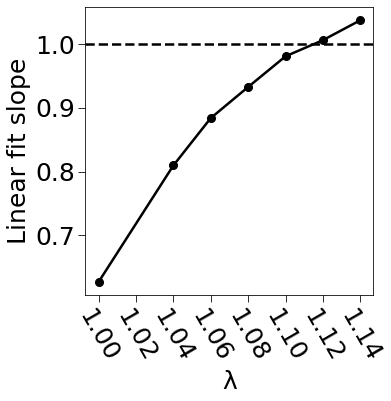

In [19]:
#Plot Rgsim vs Rgexp linear fit slope as a function of lambda

fig= plt.figure(figsize=(4,4))
axes= fig.add_axes([1,1,1,1])

plt.plot(lambdas_float, slope_vs_lambda_errweighting, '-o', color='black', linewidth=2.5, markersize=8, label='Error weighting in regression')
plt.axhline(1.0, linestyle="--", linewidth=2.5, color='black')

plt.xlabel('λ', fontsize=25)
plt.ylabel('Linear fit slope', fontsize=25)

plt.xticks(np.arange(1.00, 1.16, step=0.02), fontsize=25)
plt.yticks(fontsize=25) 

plt.tick_params(colors='black', direction='out', length=7)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)

fig.savefig("figures/RgsimRgexp_linearfitslope_vs_lambda.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/RgsimRgexp_linearfitslope_vs_lambda.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

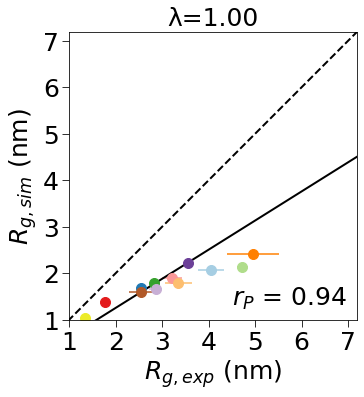

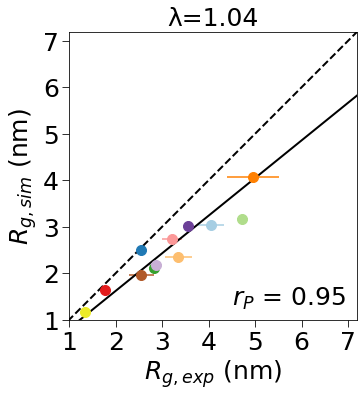

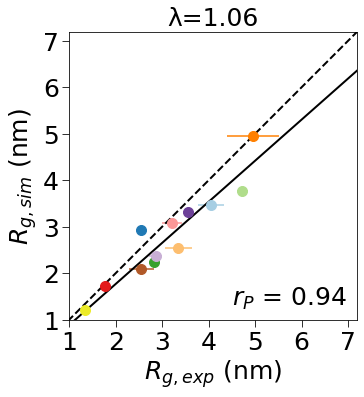

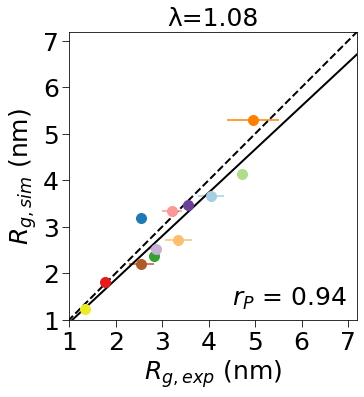

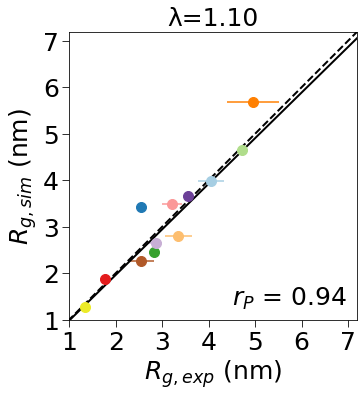

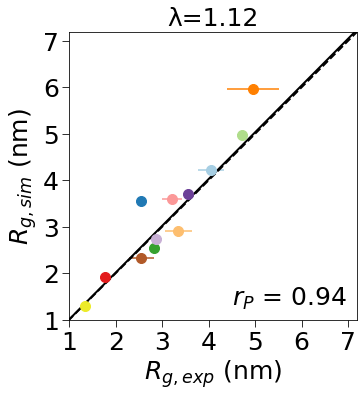

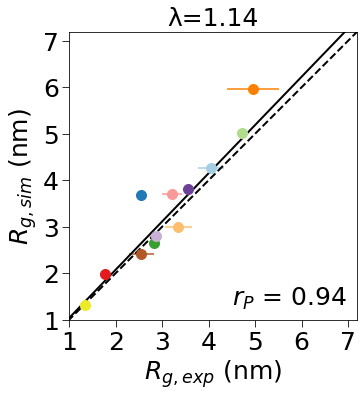

In [20]:
#Plot Rgsim vs Rgexp with linear fits

for i in range(len(lambdas)):
    
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])
    
    plt.title('λ=' + str(lambdas[i]), fontsize=25)
    plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=25)
    plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=25)
    
    plt.xlim(1.0,7.2)
    plt.ylim(1.0,7.2)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25) 
    plt.tick_params(colors='black', direction='out', length=7)

    #Plot linear fits to data
    x=[0,100]
    y=[0,100]
    plt.plot(x,y,'--',linewidth=2,color='black')
    plt.plot([1,100],[slope_vs_lambda_errweighting[i],slope_vs_lambda_errweighting[i]*100],linewidth=2,color='black', label='Error weighting in regression')
    
    plt.text(4.5, 1.3, '$r_P$ = %2.2f' % pearson_vs_lambda[i], fontsize=25)
    
    #Plot data points
    for j in range(len(proteins)):

        plt.errorbar(expRg_vs_protein_vs_lambda[i][j], simRg_vs_protein_vs_lambda[i][j], xerr=expRgerr_vs_protein_vs_lambda[i][j], yerr=simRgerr_vs_protein_vs_lambda[i][j], fmt='o', color=colors[j], markersize=10)
        #plt.text(expRg_vs_protein_vs_lambda[i][j]+0.1, simRg_vs_protein_vs_lambda[i][j]+0.12, str(proteins[j]), fontsize=14, horizontalalignment='left', verticalalignment='center')
    
    fig.savefig("figures/Rgsim_vs_Rgexp_linearfits_lambda%s.png" % lambdas[i], bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig("figures/Rgsim_vs_Rgexp_linearfits_lambda%s.pdf" % lambdas[i], bbox_inches='tight', pad_inches=1, dpi=400)

# Scaling exponent analysis

## Scaling exponent based on experimental Rg

In [21]:
#Make list of expRg expRg_err and nr residues
expRg_vs_protein = []
expRg_err_vs_protein = []
nr_residues_vs_protein = []

for i,protein in enumerate(proteins):
    expRg_vs_protein.append(exp_Rg[protein][0])
    expRg_err_vs_protein.append(exp_Rg[protein][1])
    nr_residues_vs_protein.append(nr_residues[protein])
    
expRg_vs_protein = np.array(expRg_vs_protein)
nr_residues_vs_protein = np.array(nr_residues_vs_protein)

In [22]:
#Define Rg vs length power law
def Rg_length_scaling(N, R0, v):
    return R0*(N**v)

In [23]:
#Fit Rg vs length power law to experimental Rgs
popt, pcov = curve_fit(Rg_length_scaling, nr_residues_vs_protein, expRg_vs_protein, sigma=expRg_err_vs_protein)
print(popt)
R0_exp = popt[0]
scaling_exponent_exp = popt[1]

[0.22732163 0.5484002 ]


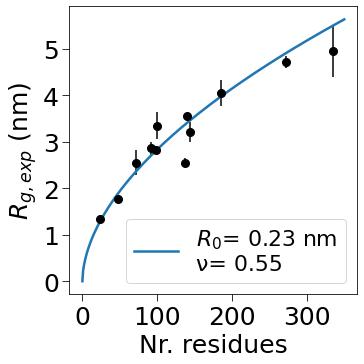

In [24]:
#Plot fit
fig= plt.figure(figsize=(4,4))
axes= fig.add_axes([1,1,1,1])

plt.plot(np.arange(0,350), Rg_length_scaling(np.arange(0,350), *popt), '-', linewidth=2.5, label='$\it{R}$$_{0}$=%5.2f nm\nν=%5.2f' % tuple(popt), markersize=8)

plt.errorbar(nr_residues_vs_protein, expRg_vs_protein, yerr=expRg_err_vs_protein, fmt='o', color='black', markersize=8)

plt.xlabel('Nr. residues', fontsize=25)
plt.ylabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=25)

plt.xticks(np.arange(0,400,step=100), fontsize=25)
plt.yticks(fontsize=25)

plt.tick_params(colors='black', direction='out', length=7)

plt.legend(fontsize=22)

fig.savefig("figures/scalingexponent_fit_Rgexp.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/scalingexponent_fit_Rgexp.pdf", bbox_inches='tight', pad_inches=1, dpi=400)


## Rg correlations normalized to length using scaling exponent determined with Rg_exp

In [25]:
simRgscaled_vs_protein_vs_lambda = []
simRgscaled_err_vs_protein_vs_lambda = []
expRgscaled_vs_protein_vs_lambda = []
expRgscaled_err_vs_protein_vs_lambda = []

for i in range(len(lambdas)): 
    simRgscaled_vs_protein_vs_lambda.append([])
    simRgscaled_err_vs_protein_vs_lambda.append([])
    expRgscaled_vs_protein_vs_lambda.append([])
    expRgscaled_err_vs_protein_vs_lambda.append([])

    for j in range(len(proteins)):
        Rg_scaling = Rg_length_scaling(nr_residues[proteins[j]], R0_exp, scaling_exponent_exp)
        
        
        simRgscaled_vs_protein_vs_lambda[i].append(simRg_vs_protein_vs_lambda[i][j]/Rg_scaling)
        simRgscaled_err_vs_protein_vs_lambda[i].append(simRgerr_vs_protein_vs_lambda[i][j]/Rg_scaling)
        expRgscaled_vs_protein_vs_lambda[i].append(expRg_vs_protein_vs_lambda[i][j]/Rg_scaling)
        expRgscaled_err_vs_protein_vs_lambda[i].append(expRgerr_vs_protein_vs_lambda[i][j]/Rg_scaling)

simRgscaled_vs_protein_vs_lambda = np.array(simRgscaled_vs_protein_vs_lambda)
simRgscaled_err_vs_protein_vs_lambda = np.array(simRgscaled_err_vs_protein_vs_lambda)
expRgscaled_vs_protein_vs_lambda = np.array(expRgscaled_vs_protein_vs_lambda)
expRgscaled_err_vs_protein_vs_lambda = np.array(expRgscaled_err_vs_protein_vs_lambda)

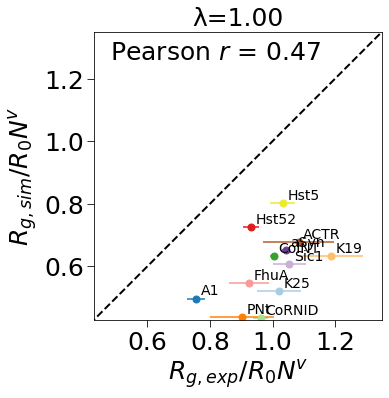

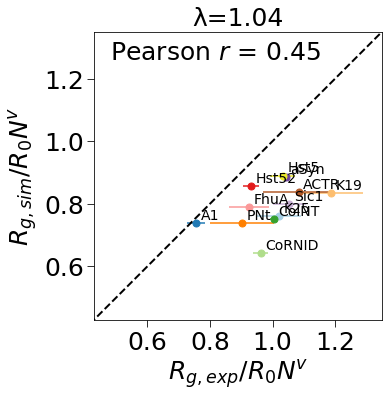

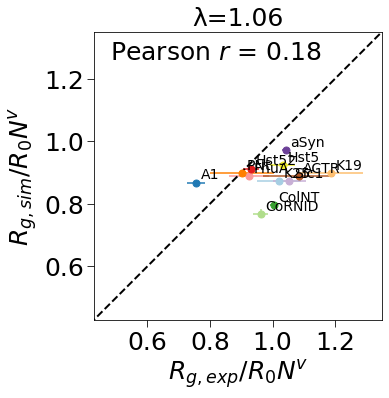

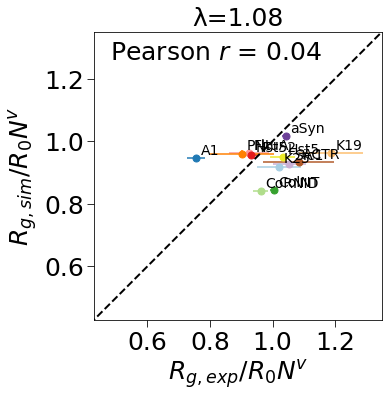

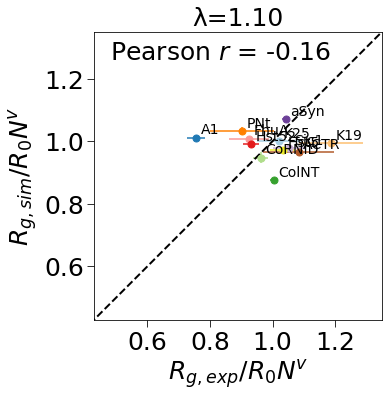

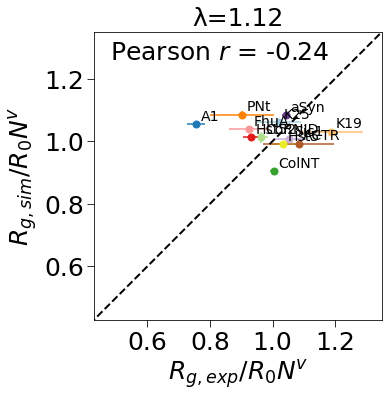

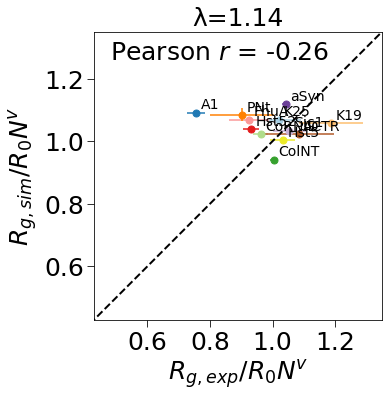

In [26]:
pearson_vs_lambda = []
spearman_vs_lambda = []

for i in range(len(lambdas)):    
    
    pearson, pval_pearson = stats.pearsonr(expRgscaled_vs_protein_vs_lambda[i],simRgscaled_vs_protein_vs_lambda[i])
    spearman, pval_spearman = stats.spearmanr(expRgscaled_vs_protein_vs_lambda[i],simRgscaled_vs_protein_vs_lambda[i])
    
    pearson_vs_lambda.append(pearson)
    spearman_vs_lambda.append(spearman)
    
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])
    
    plt.title('λ=' + str(lambdas[i]), fontsize=25)
    plt.xlabel('$\it{R}$$_{g, exp}$/$\it{R}$$_{0}$$\it{N}$$^{v}$', fontsize=25)
    plt.ylabel('$\it{R}$$_{g, sim}$/$\it{R}$$_{0}$$\it{N}$$^{v}$', fontsize=25)
    
    plt.text(0.48, 1.26, 'Pearson $\it{r}$ = %2.2f' % (pearson), fontsize=25)

    
    plt.xlim(0.43,1.35)
    plt.ylim(0.43,1.35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25) 
    plt.tick_params(colors='black', direction='out', length=7)
    
    x=[0,100]
    y=[0,100]
    plt.plot(x,y,'--',linewidth=2,color='black')
    
    #Plot data points
    for j in range(len(proteins)):
        plt.errorbar(expRgscaled_vs_protein_vs_lambda[i][j], simRgscaled_vs_protein_vs_lambda[i][j], xerr=expRgscaled_err_vs_protein_vs_lambda[i][j], yerr=simRgscaled_err_vs_protein_vs_lambda[i][j], fmt='o', color=colors[j], markersize=7, label=str(proteins[j]))
        plt.text(expRgscaled_vs_protein_vs_lambda[i][j]+0.015, simRgscaled_vs_protein_vs_lambda[i][j]+0.025, str(proteins[j]), fontsize=14, horizontalalignment='left', verticalalignment='center')
    
    fig.savefig("figures/Rgsim_vs_Rgexp_lengthnormalized_lambda%s.png" % lambdas[i], bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig("figures/Rgsim_vs_Rgexp_lengthnormalized_lambda%s.pdf" % lambdas[i], bbox_inches='tight', pad_inches=1, dpi=400)


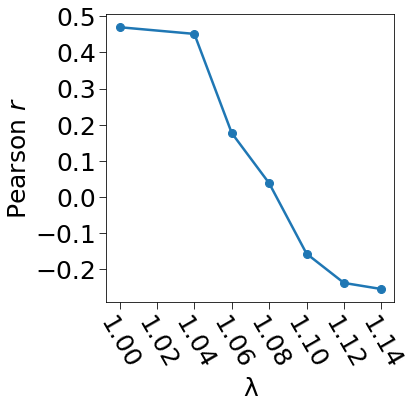

In [27]:
fig= plt.figure(figsize=(4,4))
axes= fig.add_axes([1,1,1,1])

plt.plot(lambdas_float, pearson_vs_lambda, '-o', linewidth=2.5, markersize=8, label = 'Pearson $\it{r}$')
#plt.plot(lambdas_float, spearman_vs_lambda, '-o', linewidth=2.5, markersize=8, label = 'Spearman $\it{r}$')


plt.xlabel('λ', fontsize=25)
#plt.ylabel('$\it{R}$$_{g, exp}$/$\it{R}$$_{0}$$\it{N}$$^{v}$ \n$\it{R}$$_{g, sim}$/$\it{R}$$_{0}$$\it{N}$$^{v}$ correlation', fontsize=25)
plt.ylabel('Pearson $r$', fontsize=25)

#fig.legend(fontsize=20, loc='upper center', bbox_to_anchor=(1.45, 2.2), ncol=2)

plt.xticks(np.arange(1.00, 1.16, step=0.02), fontsize=25)
plt.yticks(fontsize=25) 
plt.tick_params(colors='black', direction='out', length=7)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)

fig.savefig("figures/Rgsim_Rgexp_lengthnormalized_correlation_vs_lambda.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rgsim_Rgexp_lengthnormalized_correlation_vs_lambda.pdf", bbox_inches='tight', pad_inches=1, dpi=400)


# Sequence composition analysis

In [28]:
#Create dictionary of sequences

sequences = {}

for protein in proteins:
    
    col1 = np.genfromtxt(f'{protein}/PRO_CG.pdb', usecols=(0), dtype=str, unpack=True)     
    skip_footer = int(len(col1)) - int(np.where(col1 == 'TER')[0])
        
    residue, seq_pos = np.genfromtxt(f'{protein}/PRO_CG.pdb', usecols=(3,4), dtype=str, skip_footer = skip_footer, unpack=True)
    
    seq_pos = seq_pos.astype(int)
    sequence = []
    for i in np.unique(seq_pos, return_index=True)[1]:
        sequence.append(residue[i])
        
    sequences[protein]=sequence

## Amino-acid types

In [29]:
charged = ['ARG','HIS','LYS','ASP','GLU']
polar = ['SER','THR','ASN','GLN']
hydrophobic = ['ALA','VAL','ILE','LEU','MET','PHE','TYR','TRP']
other = ['CYS','GLY','PRO']


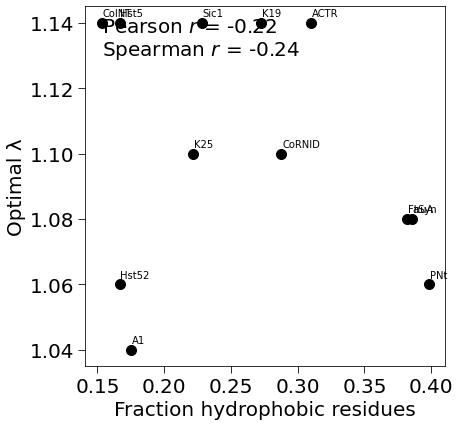

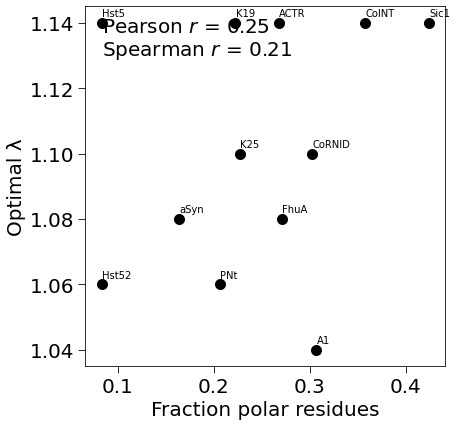

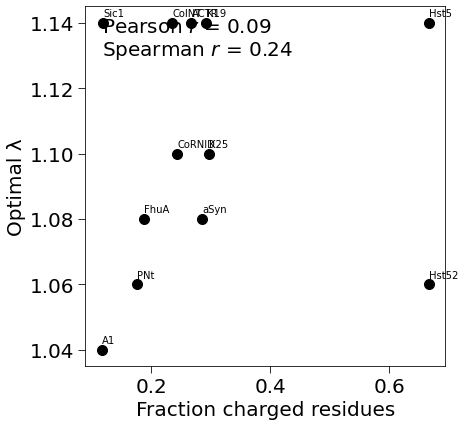

In [30]:
#lambda opt Rg
aatypes = ['hydrophobic','polar','charged']

fraction_hydrophobicaa_vs_protein = []
fraction_polaraa_vs_protein = []
fraction_chargedaa_vs_protein = []

for aatype in aatypes:
    fig= plt.figure(figsize=(5,5))
    axes= fig.add_axes([1,1,1,1])
    
    plt.xlabel(f'Fraction {aatype} residues', fontsize=20)
    plt.ylabel('Optimal λ', fontsize=20)

    plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

    fraction_aatype_vs_protein = []

    for i,protein in enumerate(proteins):
        #Get nr of residue types
        if aatype == 'hydrophobic':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], hydrophobic))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_hydrophobicaa_vs_protein.append(fraction_aatype)
        elif aatype == 'polar':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], polar))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_polaraa_vs_protein.append(fraction_aatype)
        elif aatype == 'charged':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], charged))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_chargedaa_vs_protein.append(fraction_aatype)
        else:
            break
        #Append to list
        fraction_aatype_vs_protein.append(fraction_aatype)
        
        #Plot data point
        plt.plot(fraction_aatype, lambda_mins[i], 'o', color='black', markersize=10, label=str(protein))
        plt.text(fraction_aatype+0.0005, lambda_mins[i]+0.003, str(protein), fontsize=10, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(fraction_aatype_vs_protein,lambda_mins)
    spearman, pval_spearman = stats.spearmanr(fraction_aatype_vs_protein,lambda_mins)

    plt.text(np.amin(fraction_aatype_vs_protein), 1.13, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=20)

    fig.savefig(f"figures/fraction_{aatype}_vs_lambdaopt.png", bbox_inches='tight', pad_inches=1, dpi=400)    

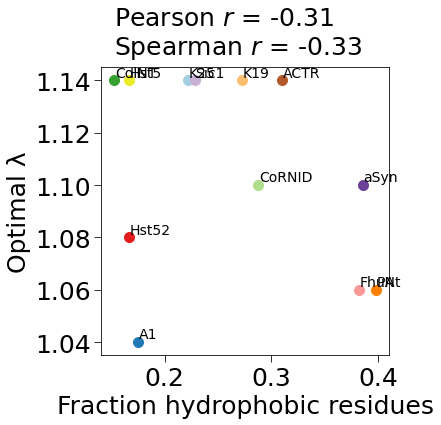

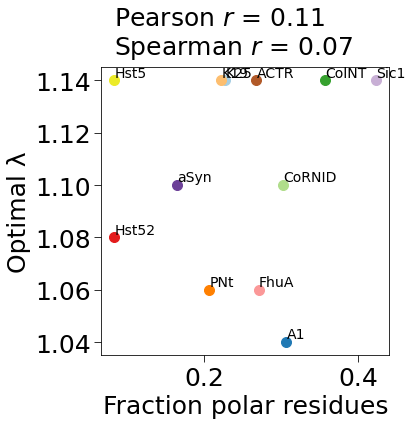

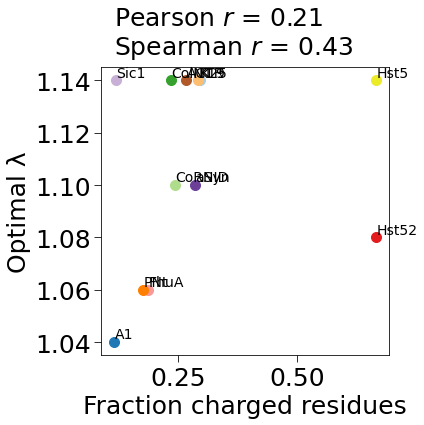

In [31]:
#lambda opt SAXS
aatypes = ['hydrophobic','polar','charged']

fraction_hydrophobicaa_vs_protein = []
fraction_polaraa_vs_protein = []
fraction_chargedaa_vs_protein = []

for aatype in aatypes:
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])
    
    plt.xlabel(f'Fraction {aatype} residues', fontsize=25)
    plt.ylabel('Optimal λ', fontsize=25)
    plt.yticks(lambdas_float, fontsize=25) 

    plt.tick_params(colors='black', direction='out', length=7, labelsize=25)

    fraction_aatype_vs_protein = []

    for i,protein in enumerate(proteins):
        #Get nr of residue types
        if aatype == 'hydrophobic':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], hydrophobic))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_hydrophobicaa_vs_protein.append(fraction_aatype)
        elif aatype == 'polar':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], polar))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_polaraa_vs_protein.append(fraction_aatype)
        elif aatype == 'charged':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], charged))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_chargedaa_vs_protein.append(fraction_aatype)
        else:
            break
        #Append to list
        fraction_aatype_vs_protein.append(fraction_aatype)
        
        #Plot data point
        plt.plot(fraction_aatype, lambda_mins_chi2[i], 'o', color=colors[i], markersize=10, label=str(protein))
        plt.text(fraction_aatype+0.0005, lambda_mins_chi2[i]+0.003, str(protein), fontsize=14, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(fraction_aatype_vs_protein,lambda_mins_chi2)
    spearman, pval_spearman = stats.spearmanr(fraction_aatype_vs_protein,lambda_mins_chi2)

    plt.text(np.amin(fraction_aatype_vs_protein), 1.15, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=25)

    fig.savefig(f"figures/fraction_{aatype}_vs_lambdaoptSAXS.png", bbox_inches='tight', pad_inches=1, dpi=400)    

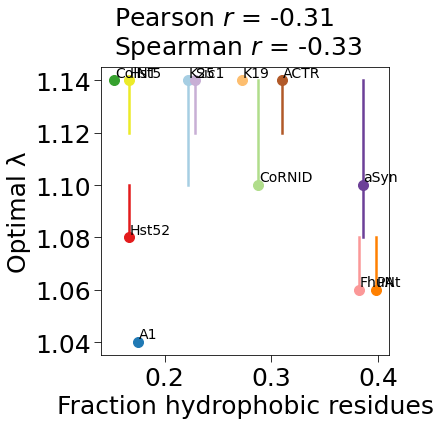

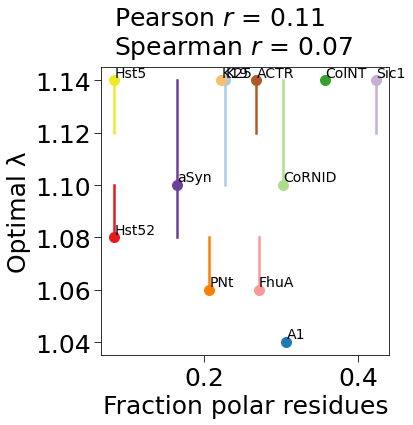

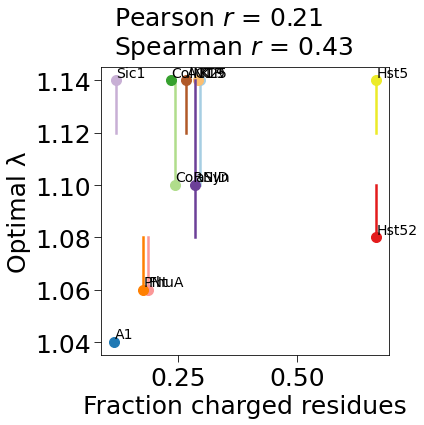

In [32]:
#lambda opt SAXS
aatypes = ['hydrophobic','polar','charged']

fraction_hydrophobicaa_vs_protein = []
fraction_polaraa_vs_protein = []
fraction_chargedaa_vs_protein = []

for aatype in aatypes:
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])
    
    plt.xlabel(f'Fraction {aatype} residues', fontsize=25)
    plt.ylabel('Optimal λ', fontsize=25)
    plt.yticks(lambdas_float, fontsize=25) 

    plt.tick_params(colors='black', direction='out', length=7, labelsize=25)

    fraction_aatype_vs_protein = []

    for i,protein in enumerate(proteins):
        #Get nr of residue types
        if aatype == 'hydrophobic':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], hydrophobic))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_hydrophobicaa_vs_protein.append(fraction_aatype)
        elif aatype == 'polar':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], polar))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_polaraa_vs_protein.append(fraction_aatype)
        elif aatype == 'charged':
            nr_aatype = np.count_nonzero(np.isin(sequences[protein], charged))
            fraction_aatype = nr_aatype/len(sequences[protein])
            fraction_chargedaa_vs_protein.append(fraction_aatype)
        else:
            break
        #Append to list
        fraction_aatype_vs_protein.append(fraction_aatype)
        
        #Plot data point
        plt.plot(fraction_aatype, lambda_mins_chi2[i], 'o', color=colors[i], markersize=10, label=str(protein))
        plt.plot((fraction_aatype,fraction_aatype),(np.amin(lambda_mins_chi2range[i]),np.amax(lambda_mins_chi2range[i])),c=colors[i],lw=2.5)
        plt.text(fraction_aatype+0.0005, lambda_mins_chi2[i]+0.003, str(protein), fontsize=14, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(fraction_aatype_vs_protein,lambda_mins_chi2)
    spearman, pval_spearman = stats.spearmanr(fraction_aatype_vs_protein,lambda_mins_chi2)

    plt.text(np.amin(fraction_aatype_vs_protein), 1.15, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=25)

    fig.savefig(f"figures/fraction_{aatype}_vs_lambdaoptSAXSrange.png", bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig(f"figures/fraction_{aatype}_vs_lambdaoptSAXSrange.pdf", bbox_inches='tight', pad_inches=1, dpi=400)    

## Sequence hydropathy decoration + sequence charge decoration analysis 

In [33]:
#Dictionaries for amino acid hydropathy and charge

#HPS
#hydropathy = {'ARG':0.0,'HIS':0.514,'LYS':0.514,'ASP':0.378,'GLU':0.459,'SER':0.595,'THR':0.676,'ASN':0.432,'GLN':0.514,'ALA':0.730,'VAL':0.892,'ILE':0.973,'LEU':0.973,'MET':0.838,'PHE':1.0,'TYR':0.865,'TRP':0.946,'CYS':0.595,'GLY':0.649,'PRO':1.0}

#M1
hydropathy = {'ARG':0.7249915947715212,'HIS':0.46519480823469783,'LYS':0.058617173158697924,'ASP':0.029182123776349763,'GLU':0.006100281608649786,'SER':0.46485701300656046,'THR':0.5379777613307019,'ASN':0.43832729970272843,'GLN':0.3268188050525212,'ALA':0.0011162643859539204,'VAL':0.41850068525598694,'ILE':0.6075268330845265,'LEU':0.5563020305733198,'MET':0.7458993420826714,'PHE':0.9216959832175945,'TYR':0.7458993420826714,'TRP':0.9844235478393931,'CYS':0.610362354303913,'GLY':0.7012713677972457,'PRO':0.37296418535993475}


charge = {'ARG':1,'HIS':0,'LYS':1,'ASP':-1,'GLU':-1}

In [34]:
SCD_vs_protein = []
SHD_vs_protein = []
scaling_exponent_vs_protein = []

#Loop over all proteins
for protein in proteins:
        
    #Calculate sequence charge decoration and sequence hydrophathy decoration
    SCD=0
    SHD=0
    for i,resi in enumerate(sequences[protein]):
        
        #Set charge of resi
        if resi not in charge.keys():
            resi_charge = 0
        else: 
            resi_charge = charge[resi]
        
        for j,resj in enumerate(sequences[protein][i+1:]):
            
            #Set charge of resj
            if resj not in charge.keys():
                resj_charge = 0
            else: 
                resj_charge = charge[resj]
            
            #Calculate sequence charge decoration (SawleGhosh2015) and add to running sum
            SCD += resi_charge*resj_charge*(abs((i+1)-(j+i+2)))**0.5
            
            #Calculate sequence hydropathy decoration (ZhengMittal2020) and add to running sum
            SHD += (hydropathy[resi]+hydropathy[resj])*(abs((i+1)-(j+i+2)))**(-1)
    
    #Normalize SCD and SHD for nr residues and append to list
    SCD = SCD/len(sequences[protein])
    SCD_vs_protein.append(SCD)
    
    SHD = SHD/len(sequences[protein])
    SHD_vs_protein.append(SHD)
    
    #Find scaling exponent using model from ZhengMittal2020 and append to list
    scaling_exponent = -0.0423*SHD + 0.0074*SCD + 0.701
    scaling_exponent_vs_protein.append(scaling_exponent)


In [35]:
SHD_SCD = {}
for i,protein in enumerate(proteins):
    SHD_SCD[protein] = f'SCD={SCD_vs_protein[i]:.3f}, SHD={SHD_vs_protein[i]:.3f}'
    
print(SHD_SCD)

{'K25': 'SCD=-4.838, SHD=3.560', 'A1': 'SCD=1.324, SHD=5.379', 'CoRNID': 'SCD=-1.060, SHD=4.428', 'ColNT': 'SCD=-0.113, SHD=3.967', 'FhuA': 'SCD=-0.240, SHD=3.888', 'Hst52': 'SCD=3.301, SHD=3.009', 'K19': 'SCD=0.978, SHD=3.383', 'PNt': 'SCD=-0.346, SHD=4.607', 'Sic1': 'SCD=3.413, SHD=3.795', 'aSyn': 'SCD=-1.228, SHD=2.966', 'Hst5': 'SCD=0.758, SHD=2.411', 'ACTR': 'SCD=1.338, SHD=3.009'}


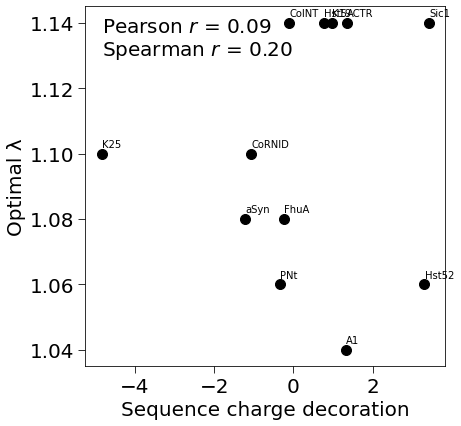

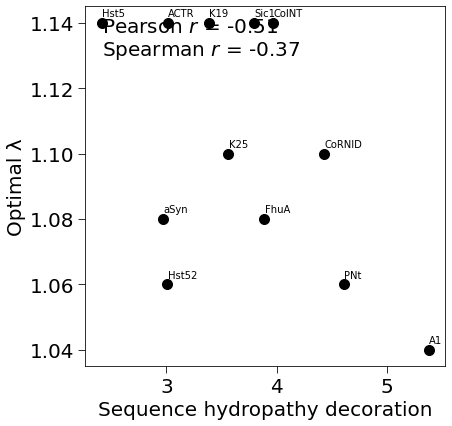

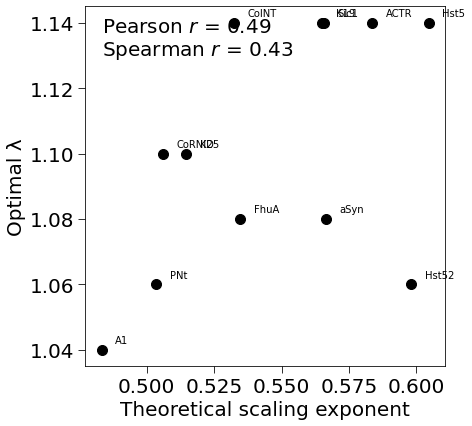

In [36]:
sequence_metrics = ['Sequence charge decoration','Sequence hydropathy decoration','Theoretical scaling exponent']

for sequence_metric in sequence_metrics:
    fig= plt.figure(figsize=(5,5))
    axes= fig.add_axes([1,1,1,1])
    
    plt.xlabel(sequence_metric, fontsize=20)
    plt.ylabel('Optimal λ', fontsize=20)

    plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

    for i,protein in enumerate(proteins):
        #Get nr of residue types
        if sequence_metric == 'Sequence charge decoration':
            data = SCD_vs_protein
        elif sequence_metric == 'Sequence hydropathy decoration':
            data = SHD_vs_protein
        elif sequence_metric == 'Theoretical scaling exponent':
            data = scaling_exponent_vs_protein
        else:
            break
        
        #Plot data point
        plt.plot(data[i], lambda_mins[i], 'o', color='black', markersize=10, label=str(protein))
        plt.text(data[i]+0.005, lambda_mins[i]+0.003, str(protein), fontsize=10, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(data,lambda_mins)
    spearman, pval_spearman = stats.spearmanr(data,lambda_mins)

    plt.text(np.amin(data), 1.13, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=20)

    fig.savefig(f"figures/{sequence_metric}_vs_lambdaopt.png", bbox_inches='tight', pad_inches=1, dpi=400)    

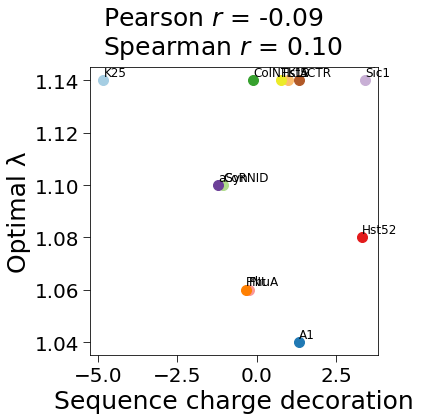

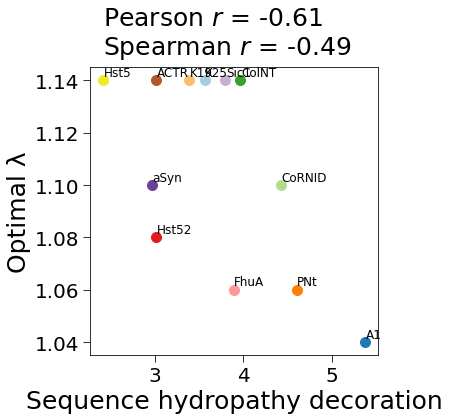

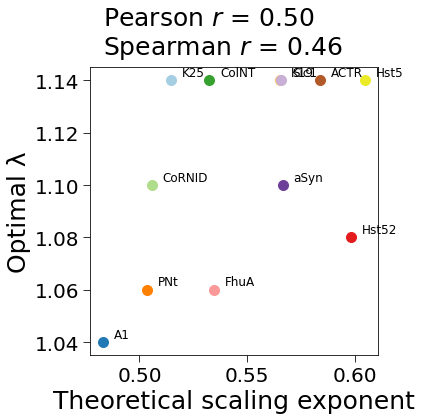

In [37]:
sequence_metrics = ['Sequence charge decoration','Sequence hydropathy decoration','Theoretical scaling exponent']

for sequence_metric in sequence_metrics:
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])
    
    plt.xlabel(sequence_metric, fontsize=25)
    plt.ylabel('Optimal λ', fontsize=25)

    plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

    for i,protein in enumerate(proteins):
        #Get nr of residue types
        if sequence_metric == 'Sequence charge decoration':
            data = SCD_vs_protein
        elif sequence_metric == 'Sequence hydropathy decoration':
            data = SHD_vs_protein
        elif sequence_metric == 'Theoretical scaling exponent':
            data = scaling_exponent_vs_protein
        else:
            break
        
        #Plot data point
        plt.plot(data[i], lambda_mins_chi2[i], 'o', color=colors[i], markersize=10, label=str(protein))
        plt.text(data[i]+0.005, lambda_mins_chi2[i]+0.003, str(protein), fontsize=12, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(data,lambda_mins_chi2)
    spearman, pval_spearman = stats.spearmanr(data,lambda_mins_chi2)

    plt.text(np.amin(data), 1.15, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=25)

    fig.savefig(f"figures/{sequence_metric}_vs_lambdaoptSAXS.png", bbox_inches='tight', pad_inches=1, dpi=400)    

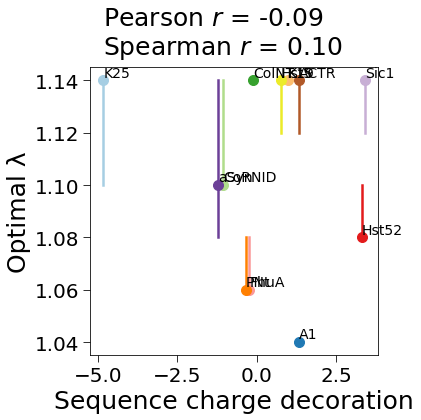

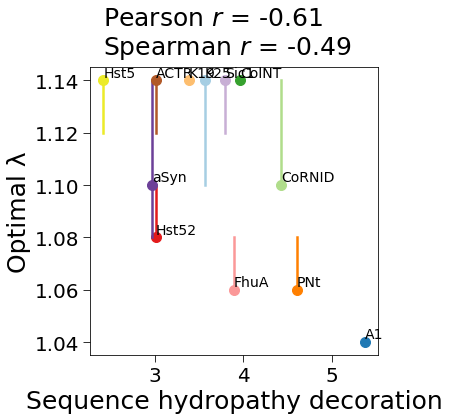

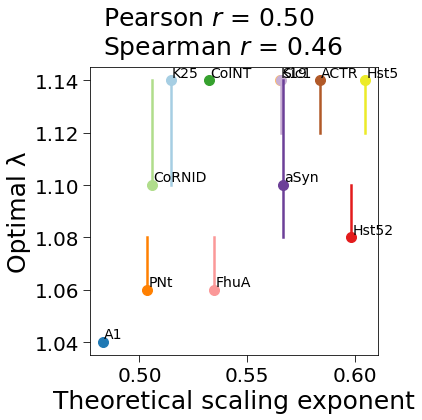

In [38]:
sequence_metrics = ['Sequence charge decoration','Sequence hydropathy decoration','Theoretical scaling exponent']

for sequence_metric in sequence_metrics:
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])
    
    plt.xlabel(sequence_metric, fontsize=25)
    plt.ylabel('Optimal λ', fontsize=25)

    plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

    for i,protein in enumerate(proteins):
        #Get nr of residue types
        if sequence_metric == 'Sequence charge decoration':
            data = SCD_vs_protein
        elif sequence_metric == 'Sequence hydropathy decoration':
            data = SHD_vs_protein
        elif sequence_metric == 'Theoretical scaling exponent':
            data = scaling_exponent_vs_protein
        else:
            break
        
        #Plot data point
        plt.plot(data[i], lambda_mins_chi2[i], 'o', color=colors[i], markersize=10, label=str(protein))
        plt.plot((data[i],data[i]),(np.amin(lambda_mins_chi2range[i]),np.amax(lambda_mins_chi2range[i])),c=colors[i],lw=2.5)
        plt.text(data[i]+0.0005, lambda_mins_chi2[i]+0.003, str(protein), fontsize=14, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(data,lambda_mins_chi2)
    spearman, pval_spearman = stats.spearmanr(data,lambda_mins_chi2)

    plt.text(np.amin(data), 1.15, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=25)

        
    fig.savefig(f"figures/{sequence_metric}_vs_lambdaoptSAXSrange.png", bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig(f"figures/{sequence_metric}_vs_lambdaoptSAXSrange.pdf", bbox_inches='tight', pad_inches=1, dpi=400)    

## Martini bead types analysis

In [39]:
def count_beads(beads_list,bead_type):
    bead_count=0
    for bead in beads_list:
        if bead_type in bead:
            bead_count+=1
    return bead_count

In [40]:
fraction_apolar_vs_protein = []
fraction_nonpolar_vs_protein = [] 
fraction_polar_vs_protein = []
fraction_charged_vs_protein = [] 
fraction_divalentcharged_vs_protein = [] 

for protein in proteins:
    topfile = f'{protein}/all_PRO.top'
    
    #Find Protein beads lines in topology
    with open(topfile, 'r') as f:
        toplines = f.readlines()

    for i in range(len(toplines)):
        if '[ moleculetype ]' in toplines[i]:
            if 'Protein' in toplines[i+1]:
                protein_start_line = i+1
                break

    #print('Protein start lines is: ' + str(protein_start_line) + ' and containts ' + str(toplines[protein_start_line]))

    for i in range(protein_start_line,len(toplines)):
        if '[ atoms ]' in toplines[i]:
                beads_start_line = i+1
                break

    #print('Protein beads start at: ' + str(beads_start_line) + ' and contain ' + str(toplines[beads_start_line]))

    for i in range(beads_start_line,len(toplines)):
        if '[' in toplines[i]:
            beads_end_line = i-1
            break

    #print('Protein beads end at: ' + str(beads_end_line) + ' and contain ' + str(toplines[beads_end_line]))

    atom_nr, bead_type, res_nr, res_type, bead_name, charge = np.loadtxt(topfile, usecols=(0,1,2,3,4,6), dtype=str, skiprows=beads_start_line, max_rows=beads_end_line-beads_start_line, unpack=True)

    nr_apolar = count_beads(bead_type,'C')
    nr_nonpolar = count_beads(bead_type,'N')
    nr_polar = count_beads(bead_type,'P')
    nr_charged = count_beads(bead_type,'Q')
    nr_divalentcharged = count_beads(bead_type,'D')
    
    assert(nr_apolar + nr_nonpolar + nr_polar + nr_charged + nr_divalentcharged==len(bead_type))
    
    if nr_divalentcharged != 0:
        print('WARNING! Nr of divalent ions is not 0, and this is not really considered in the following analysis')
    
    fraction_apolar_vs_protein.append(nr_apolar/len(bead_type))
    fraction_nonpolar_vs_protein.append(nr_nonpolar/len(bead_type))
    fraction_polar_vs_protein.append(nr_polar/len(bead_type))
    fraction_charged_vs_protein.append(nr_charged/len(bead_type))
    fraction_divalentcharged_vs_protein.append(nr_divalentcharged/len(bead_type))    

In [41]:
fraction_apolar_vs_protein = np.array(fraction_apolar_vs_protein)
fraction_nonpolar_vs_protein = np.array(fraction_nonpolar_vs_protein)
fraction_polar_vs_protein = np.array(fraction_polar_vs_protein)
fraction_charged_vs_protein = np.array(fraction_charged_vs_protein)
fraction_divalentcharged_vs_protein = np.array(fraction_divalentcharged_vs_protein)

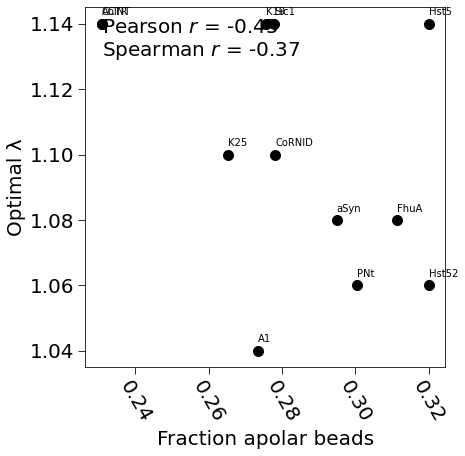

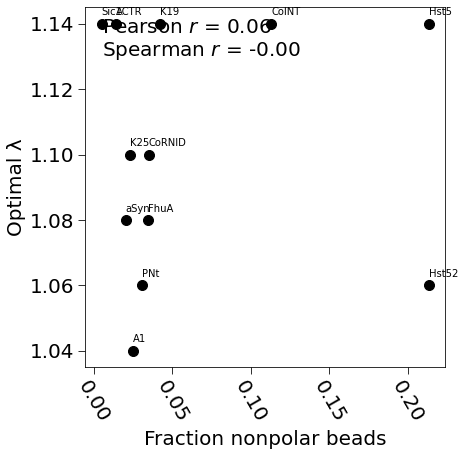

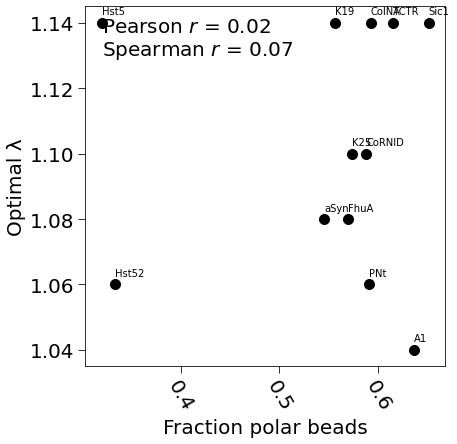

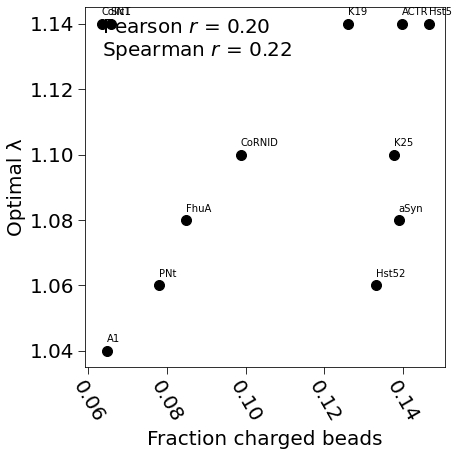

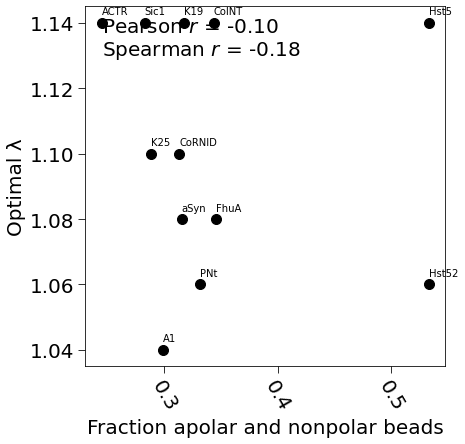

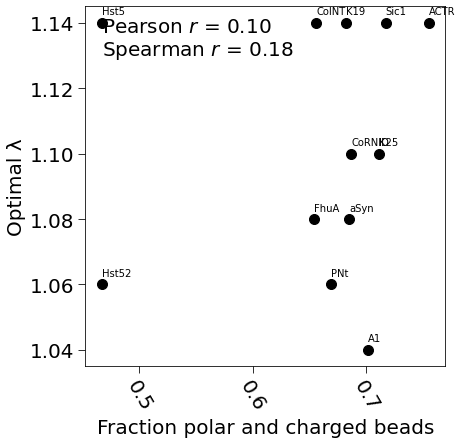

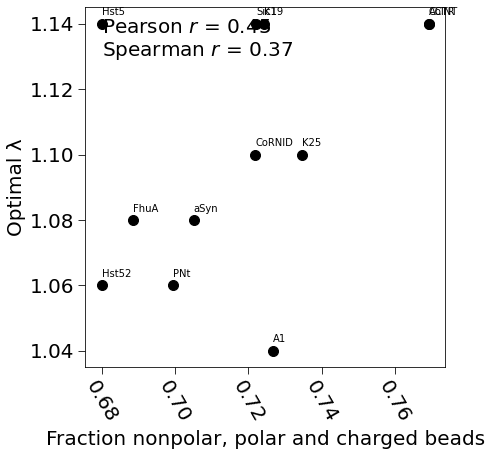

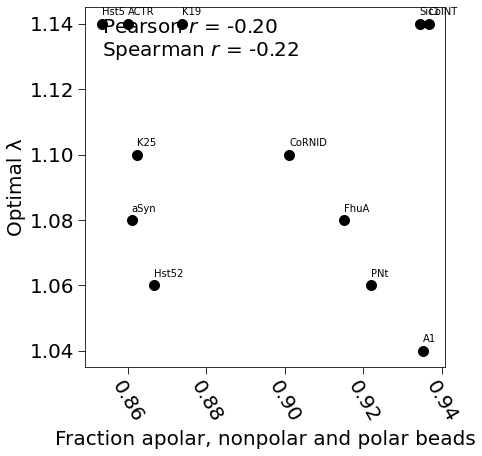

In [42]:
bead_type_combs = ['apolar', 'nonpolar', 'polar', 'charged', 'apolar and nonpolar', 'polar and charged', 'nonpolar, polar and charged', 'apolar, nonpolar and polar']

pearson_vs_bead_type_combs = []
spearman_vs_bead_type_combs = []

for bead_type_comb in bead_type_combs:
    
    if bead_type_comb == 'apolar':
        data = fraction_apolar_vs_protein
    elif bead_type_comb == 'nonpolar':
        data = fraction_nonpolar_vs_protein
    elif bead_type_comb == 'polar':
        data = fraction_polar_vs_protein
    elif bead_type_comb == 'charged':
        data = fraction_charged_vs_protein
    elif bead_type_comb == 'apolar and nonpolar':
        data = fraction_apolar_vs_protein + fraction_nonpolar_vs_protein
    elif bead_type_comb == 'polar and charged':
        data = fraction_polar_vs_protein + fraction_charged_vs_protein
    elif bead_type_comb == 'nonpolar, polar and charged':
        data = fraction_nonpolar_vs_protein + fraction_polar_vs_protein + fraction_charged_vs_protein
    elif bead_type_comb == 'apolar, nonpolar and polar':
        data = fraction_apolar_vs_protein + fraction_nonpolar_vs_protein + fraction_polar_vs_protein
    else:
        break
    
    fig= plt.figure(figsize=(5,5))
    axes= fig.add_axes([1,1,1,1])

    plt.xlabel(f'Fraction {bead_type_comb} beads', fontsize=20)
    plt.ylabel('Optimal λ', fontsize=20)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20) 
    plt.tick_params(colors='black', direction='out', length=7)
    plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=20, rotation=-60)

    for i,protein in enumerate(proteins):

        #Plot data point
        plt.plot(data[i], lambda_mins[i], 'o', color='black', markersize=10, label=str(protein))
        plt.text(data[i], lambda_mins[i]+0.0035, str(protein), fontsize=10, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(data,lambda_mins)
    pearson_vs_bead_type_combs.append(pearson)
    
    spearman, pval_spearman = stats.spearmanr(data,lambda_mins)
    spearman_vs_bead_type_combs.append(spearman)

    plt.text(np.amin(data), 1.13, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=20)


    fig.savefig(f"figures/fraction_{bead_type_comb}_lambdaopt.png", bbox_inches='tight', pad_inches=1, dpi=400)

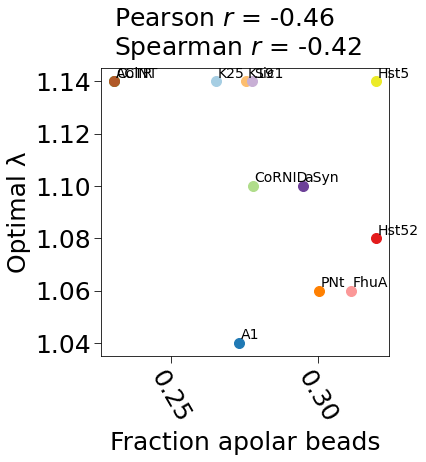

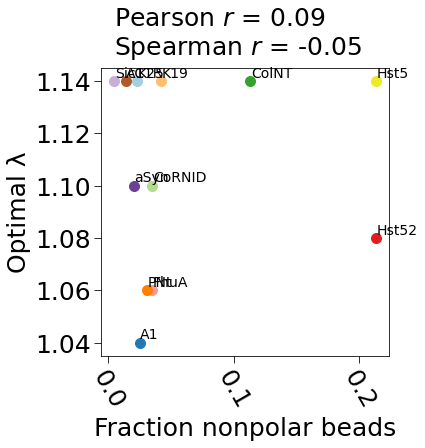

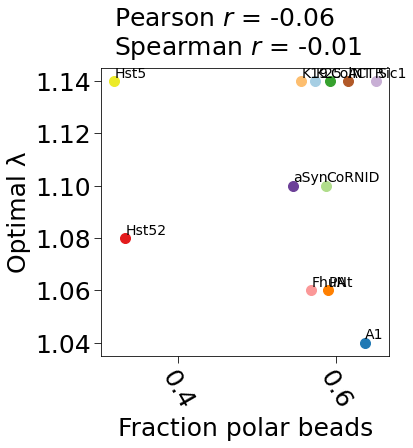

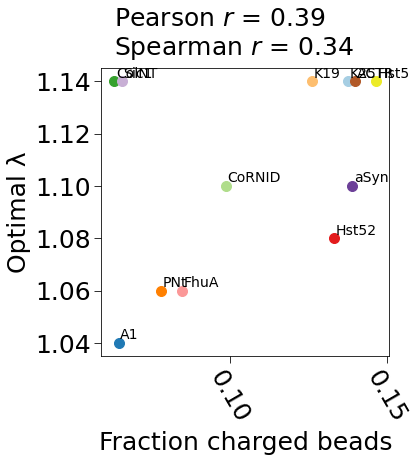

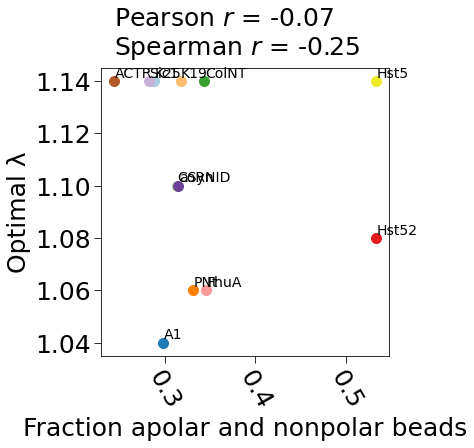

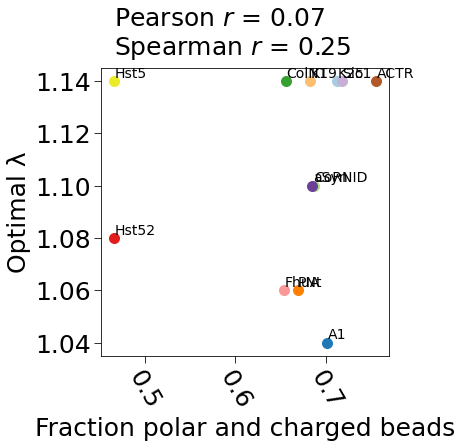

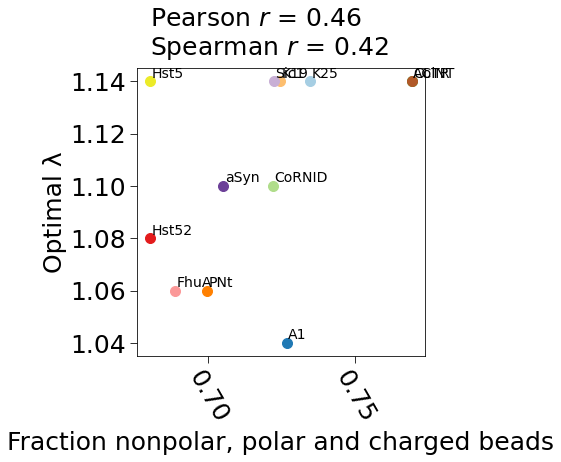

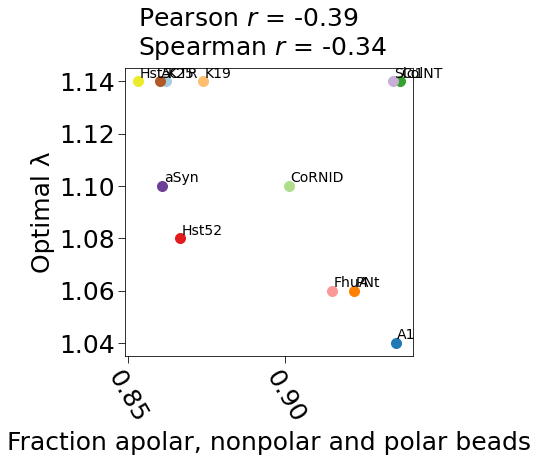

In [43]:
bead_type_combs = ['apolar', 'nonpolar', 'polar', 'charged', 'apolar and nonpolar', 'polar and charged', 'nonpolar, polar and charged', 'apolar, nonpolar and polar']

pearson_vs_bead_type_combs = []
spearman_vs_bead_type_combs = []

for bead_type_comb in bead_type_combs:
    
    if bead_type_comb == 'apolar':
        data = fraction_apolar_vs_protein
    elif bead_type_comb == 'nonpolar':
        data = fraction_nonpolar_vs_protein
    elif bead_type_comb == 'polar':
        data = fraction_polar_vs_protein
    elif bead_type_comb == 'charged':
        data = fraction_charged_vs_protein
    elif bead_type_comb == 'apolar and nonpolar':
        data = fraction_apolar_vs_protein + fraction_nonpolar_vs_protein
    elif bead_type_comb == 'polar and charged':
        data = fraction_polar_vs_protein + fraction_charged_vs_protein
    elif bead_type_comb == 'nonpolar, polar and charged':
        data = fraction_nonpolar_vs_protein + fraction_polar_vs_protein + fraction_charged_vs_protein
    elif bead_type_comb == 'apolar, nonpolar and polar':
        data = fraction_apolar_vs_protein + fraction_nonpolar_vs_protein + fraction_polar_vs_protein
    else:
        break
    
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])

    plt.xlabel(f'Fraction {bead_type_comb} beads', fontsize=25)
    plt.ylabel('Optimal λ', fontsize=25)

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25) 
    plt.tick_params(colors='black', direction='out', length=7)
    plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)

    for i,protein in enumerate(proteins):

        #Plot data point
        plt.plot(data[i], lambda_mins_chi2[i], 'o', color=colors[i], markersize=10, label=str(protein))
        plt.text(data[i]+0.0005, lambda_mins_chi2[i]+0.003, str(protein), fontsize=14, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(data,lambda_mins_chi2)
    pearson_vs_bead_type_combs.append(pearson)
    
    spearman, pval_spearman = stats.spearmanr(data,lambda_mins_chi2)
    spearman_vs_bead_type_combs.append(spearman)

    plt.text(np.amin(data), 1.15, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=25)

    fig.savefig(f"figures/fraction_{bead_type_comb}beads_lambdaoptSAXS.png", bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig(f"figures/fraction_{bead_type_comb}beads_lambdaoptSAXS.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

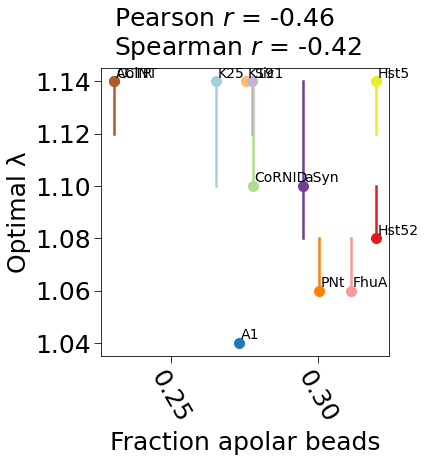

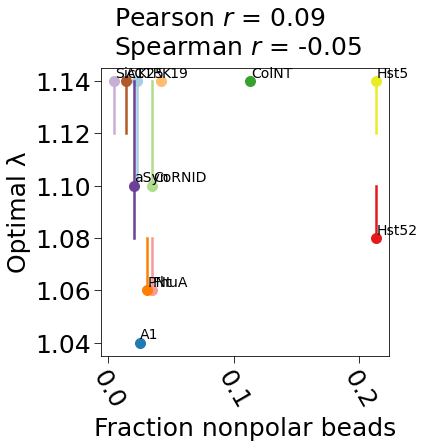

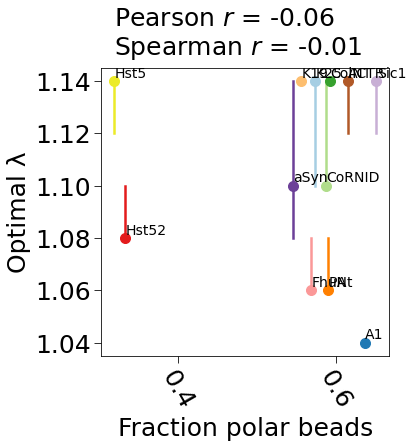

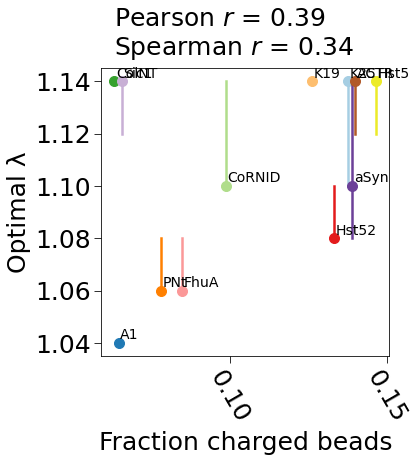

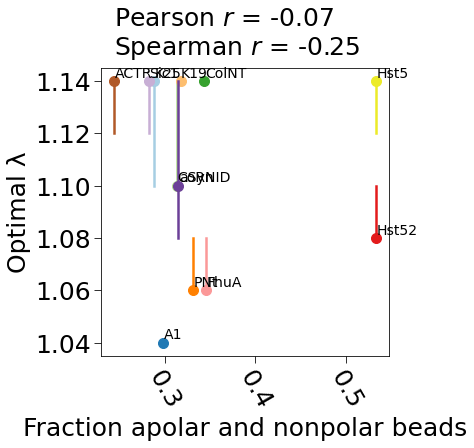

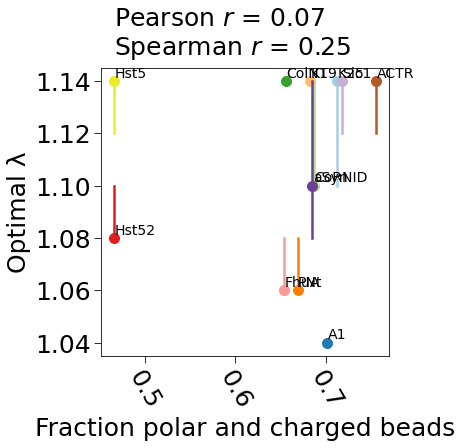

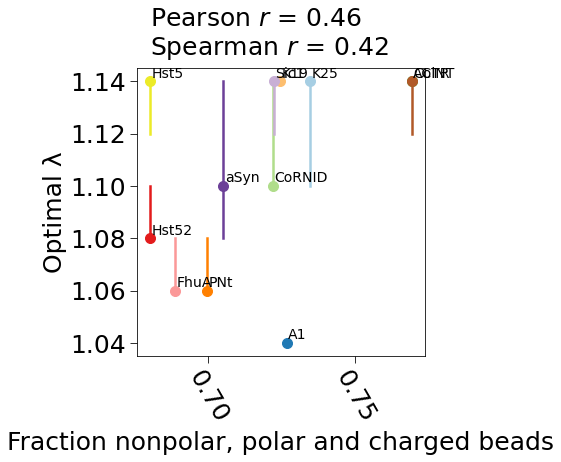

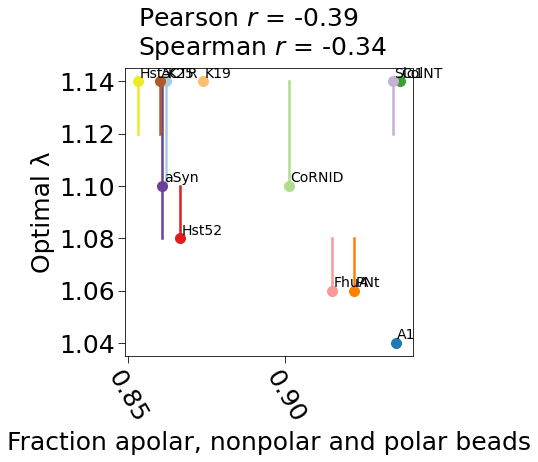

In [44]:
bead_type_combs = ['apolar', 'nonpolar', 'polar', 'charged', 'apolar and nonpolar', 'polar and charged', 'nonpolar, polar and charged', 'apolar, nonpolar and polar']

pearson_vs_bead_type_combs = []
spearman_vs_bead_type_combs = []

for bead_type_comb in bead_type_combs:
    
    if bead_type_comb == 'apolar':
        data = fraction_apolar_vs_protein
    elif bead_type_comb == 'nonpolar':
        data = fraction_nonpolar_vs_protein
    elif bead_type_comb == 'polar':
        data = fraction_polar_vs_protein
    elif bead_type_comb == 'charged':
        data = fraction_charged_vs_protein
    elif bead_type_comb == 'apolar and nonpolar':
        data = fraction_apolar_vs_protein + fraction_nonpolar_vs_protein
    elif bead_type_comb == 'polar and charged':
        data = fraction_polar_vs_protein + fraction_charged_vs_protein
    elif bead_type_comb == 'nonpolar, polar and charged':
        data = fraction_nonpolar_vs_protein + fraction_polar_vs_protein + fraction_charged_vs_protein
    elif bead_type_comb == 'apolar, nonpolar and polar':
        data = fraction_apolar_vs_protein + fraction_nonpolar_vs_protein + fraction_polar_vs_protein
    else:
        break
    
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])

    plt.xlabel(f'Fraction {bead_type_comb} beads', fontsize=25)
    plt.ylabel('Optimal λ', fontsize=25)

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25) 
    plt.tick_params(colors='black', direction='out', length=7)
    plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)

    for i,protein in enumerate(proteins):

        #Plot data point
        plt.plot(data[i], lambda_mins_chi2[i], 'o', color=colors[i], markersize=10, label=str(protein))
        plt.plot((data[i],data[i]),(np.amin(lambda_mins_chi2range[i]),np.amax(lambda_mins_chi2range[i])),c=colors[i],lw=2.5)
        plt.text(data[i]+0.0005, lambda_mins_chi2[i]+0.003, str(protein), fontsize=14, horizontalalignment='left', verticalalignment='center')
    
    pearson, pval_pearson = stats.pearsonr(data,lambda_mins_chi2)
    pearson_vs_bead_type_combs.append(pearson)
    
    spearman, pval_spearman = stats.spearmanr(data,lambda_mins_chi2)
    spearman_vs_bead_type_combs.append(spearman)

    plt.text(np.amin(data), 1.15, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=25)

    fig.savefig(f"figures/fraction_{bead_type_comb}beads_lambdaoptSAXSrange.png", bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig(f"figures/fraction_{bead_type_comb}beads_lambdaoptSAXSrange.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

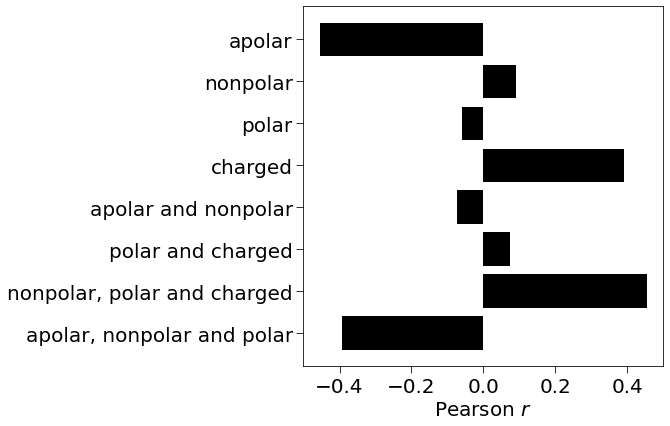

In [45]:
#Plot pearson r for each bead type combination SAXS
fig= plt.figure(figsize=(5,5))
axes= fig.add_axes([1,1,1,1])

plt.barh(bead_type_combs[::-1], pearson_vs_bead_type_combs[::-1], align='center', color='black')

plt.xlabel('Pearson ${r}$', fontsize=20)

plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/bead_types_pearsoncorrelationsSAXS.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/bead_types_pearsoncorrelationsSAXS.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

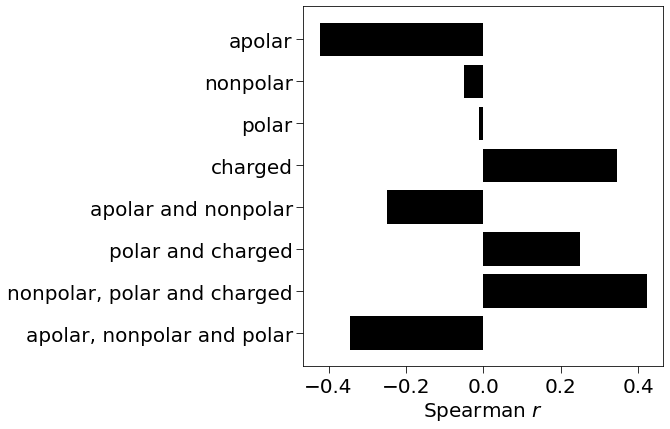

In [46]:
#Plot spearman r for each bead type combination
fig= plt.figure(figsize=(5,5))
axes= fig.add_axes([1,1,1,1])

plt.barh(bead_type_combs[::-1], spearman_vs_bead_type_combs[::-1], align='center', color='black')

plt.xlabel('Spearman ${r}$', fontsize=20)

plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/bead_types_spearmancorrelationsSAXS.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/bead_types_spearmancorrelationsSAXS.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Amino acids analysis

In [47]:
AAs = ['ALA','VAL','ILE','LEU','MET','PHE','TYR','TRP','ARG','HIS','LYS','ASP','GLU','SER','THR','ASN','GLN','CYS','GLY','PRO']

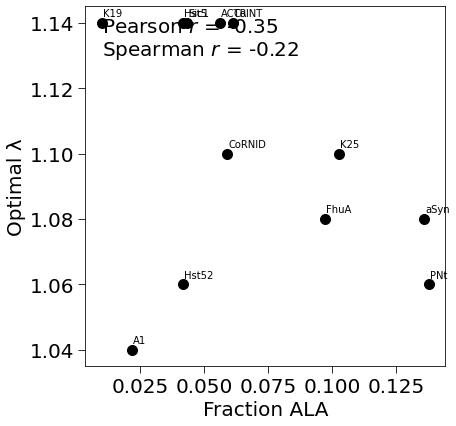

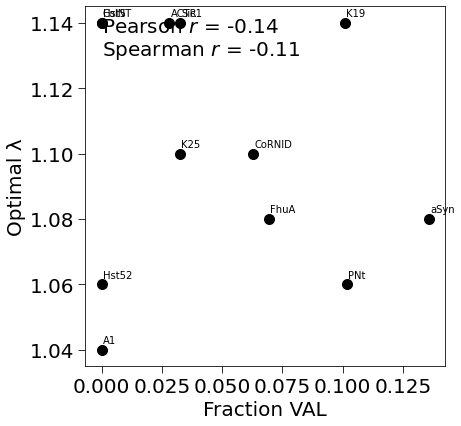

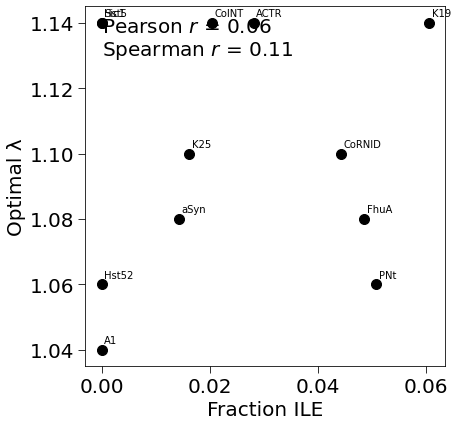

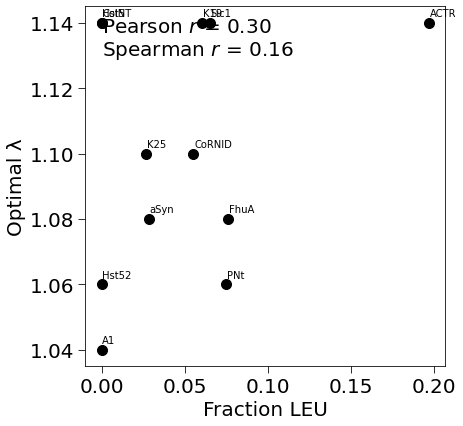

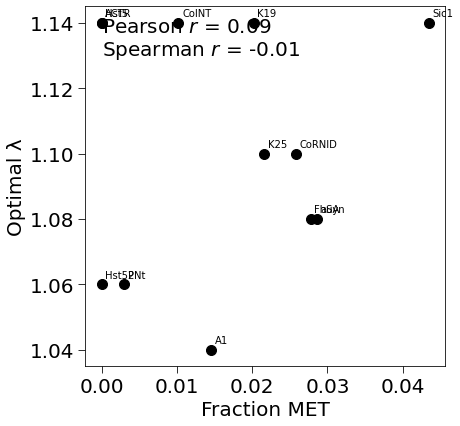

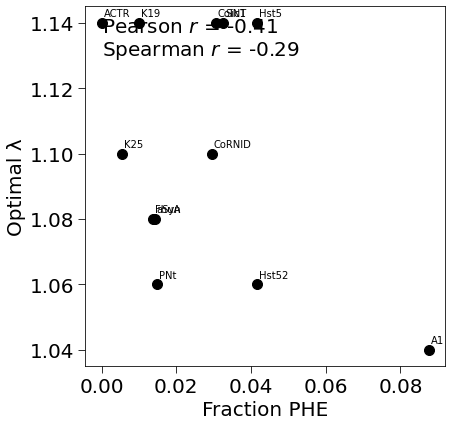

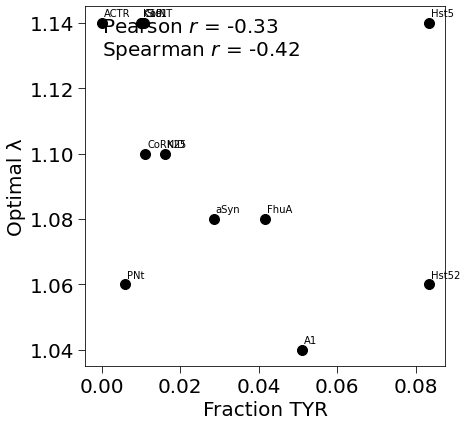

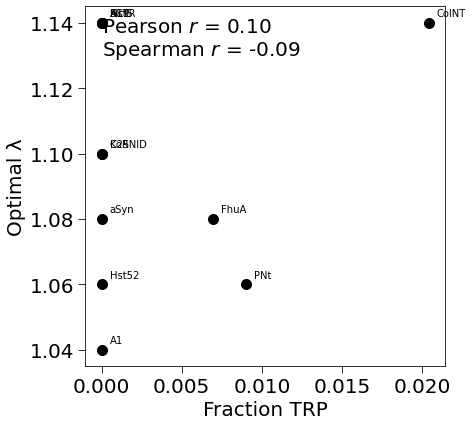

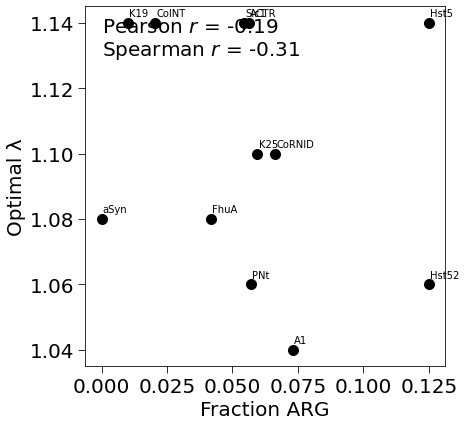

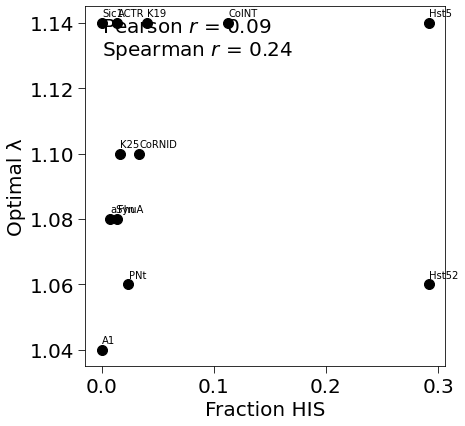

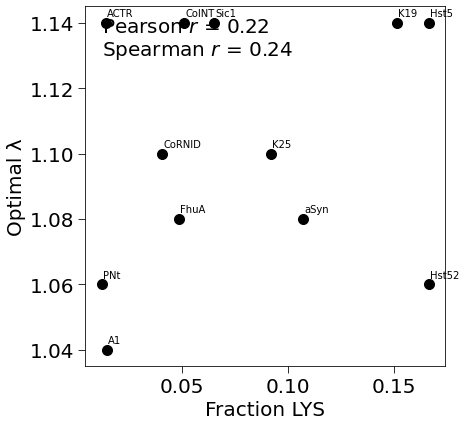

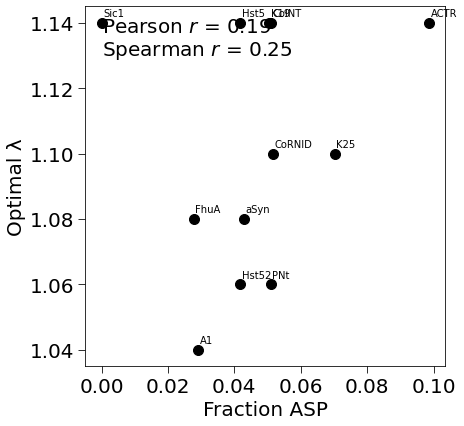

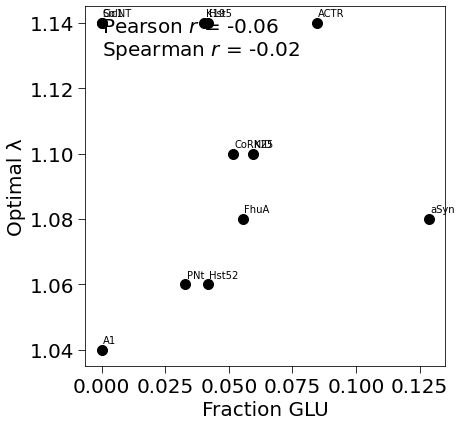

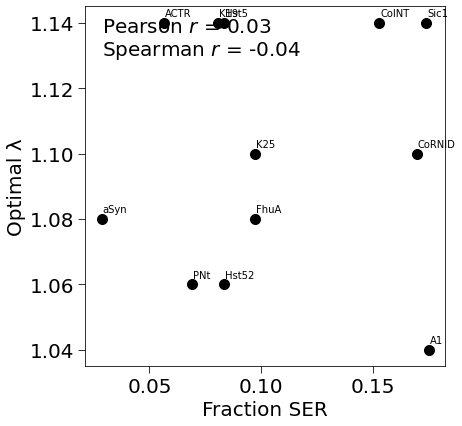

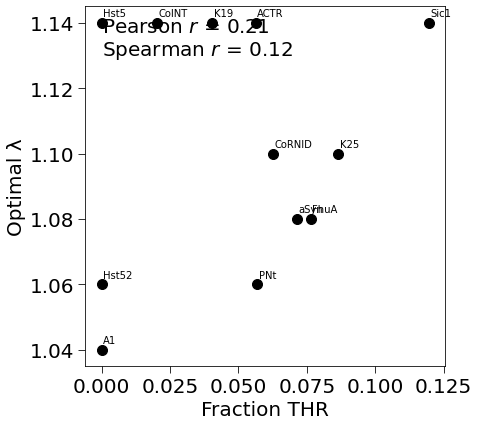

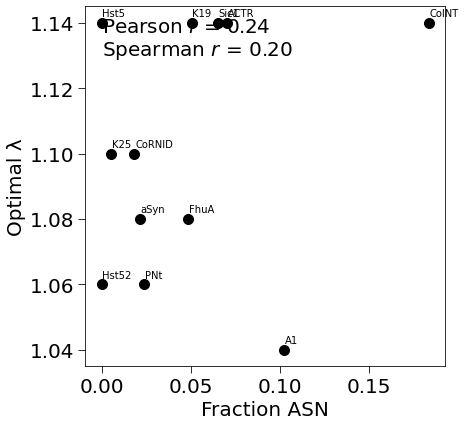

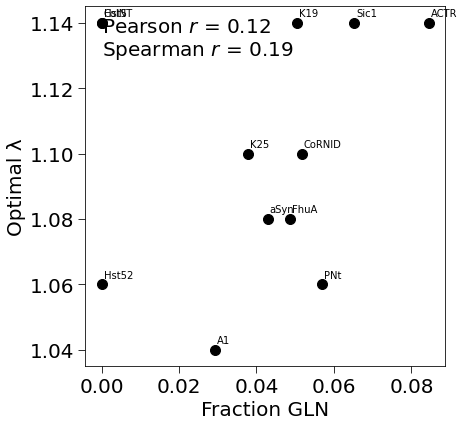

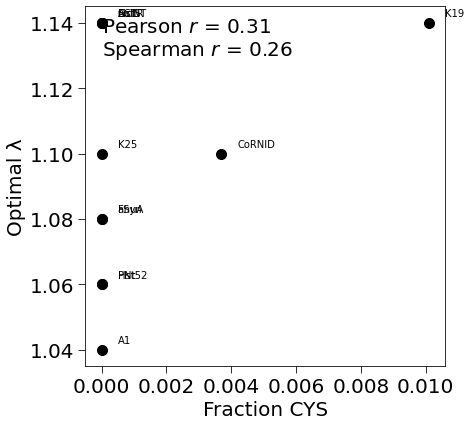

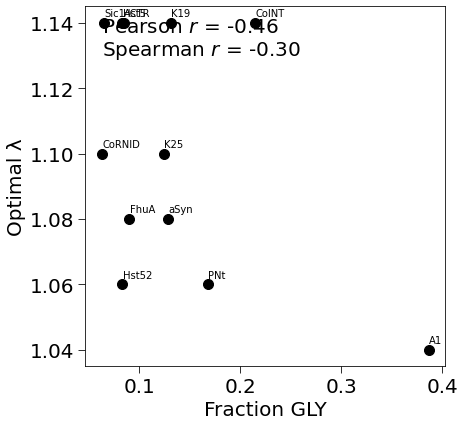

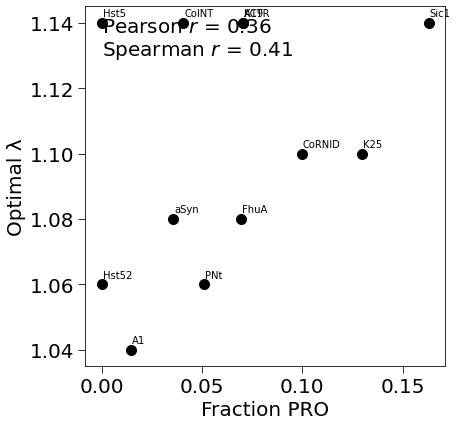

In [48]:
pearson_vs_AA = []
spearman_vs_AA = []

for AA in AAs:
    fig= plt.figure(figsize=(5,5))
    axes= fig.add_axes([1,1,1,1])
    
    plt.xlabel(f'Fraction {AA}', fontsize=20)
    plt.ylabel('Optimal λ', fontsize=20)

    plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

    fraction_AA_vs_protein = []

    for i,protein in enumerate(proteins):
        #Get nr of residue types
        nr_AA = np.count_nonzero(np.isin(sequences[protein], AA))
        fraction_AA = nr_AA/len(sequences[protein])

        #Append to list
        fraction_AA_vs_protein.append(fraction_AA)
        
        #Plot data point
        plt.plot(fraction_AA, lambda_mins[i], 'o', color='black', markersize=10, label=str(protein))
        plt.text(fraction_AA+0.0005, lambda_mins[i]+0.003, str(protein), fontsize=10, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(fraction_AA_vs_protein,lambda_mins)
    pearson_vs_AA.append(pearson)

    spearman, pval_spearman = stats.spearmanr(fraction_AA_vs_protein,lambda_mins)
    spearman_vs_AA.append(spearman)

    plt.text(np.amin(fraction_AA_vs_protein), 1.13, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=20)

    fig.savefig(f"figures/fraction_{AA}_vs_lambdaopt.png", bbox_inches='tight', pad_inches=1, dpi=400)    

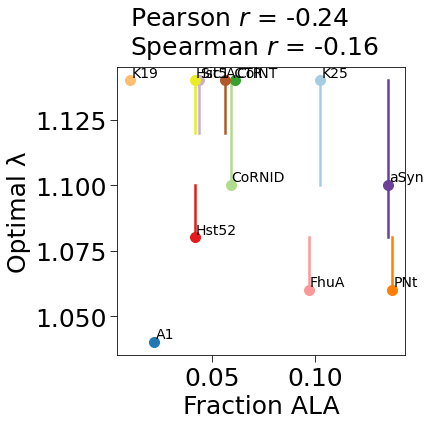

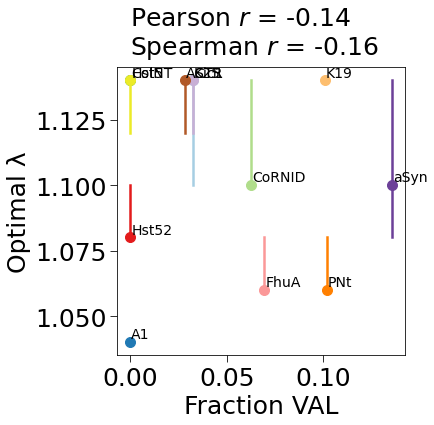

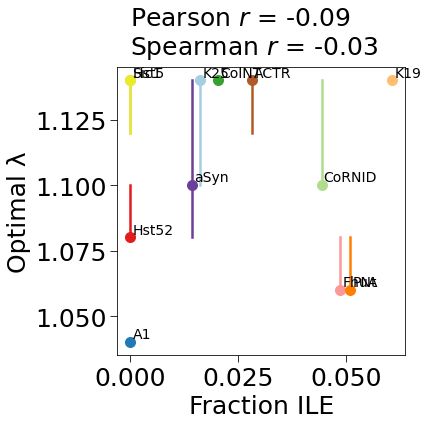

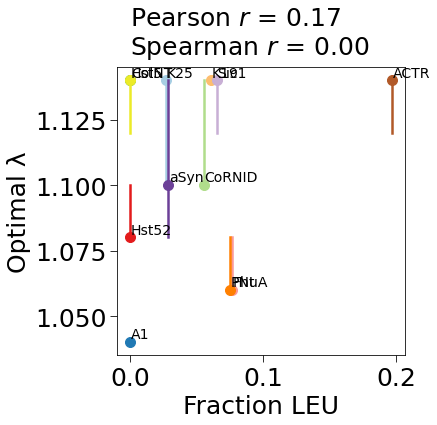

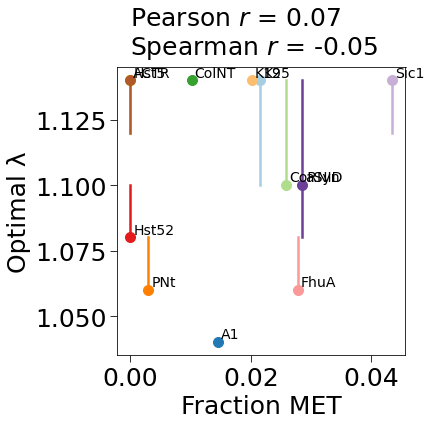

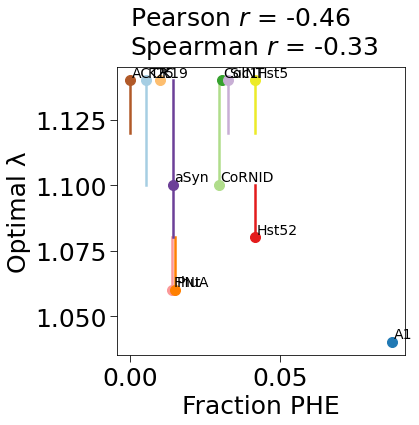

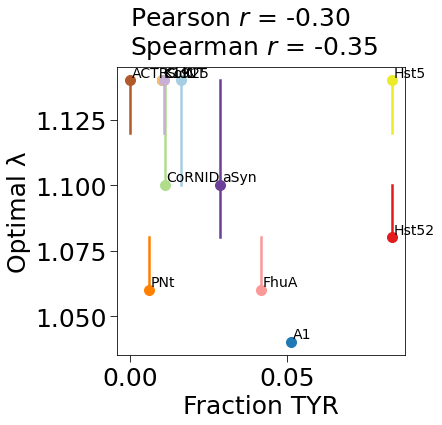

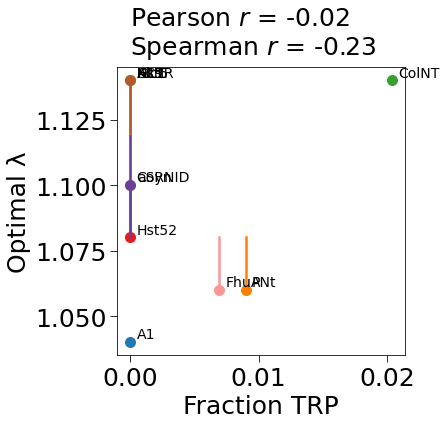

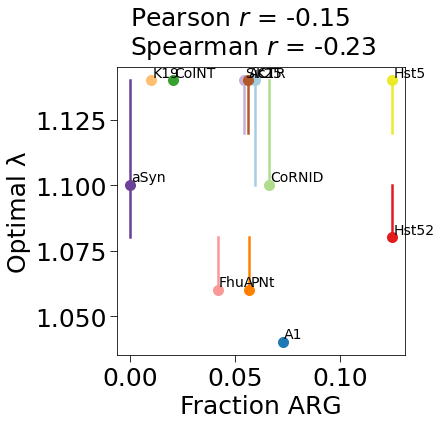

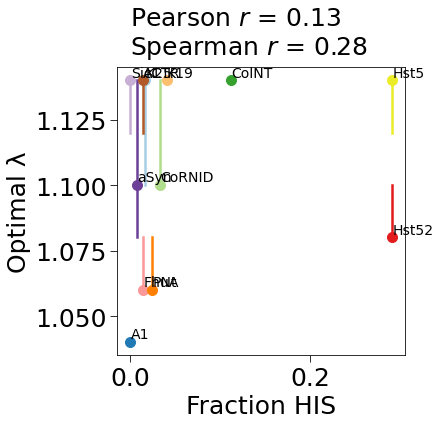

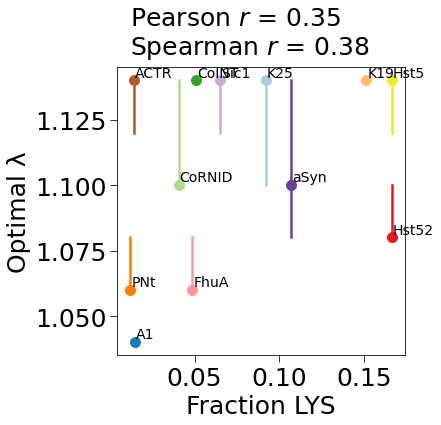

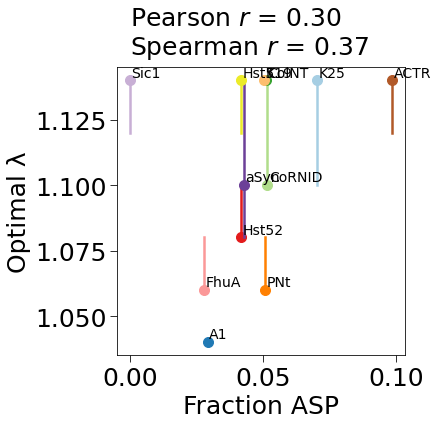

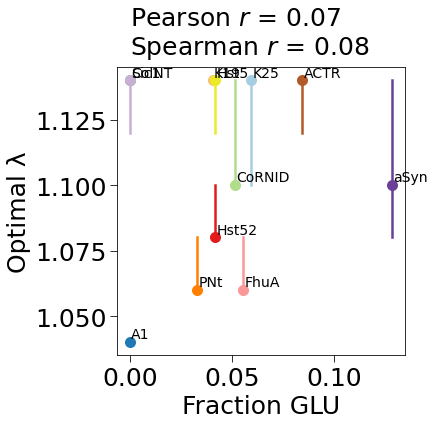

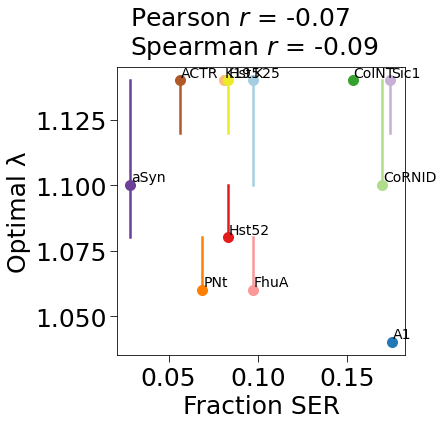

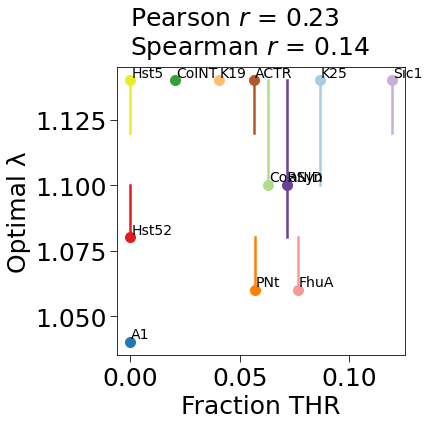

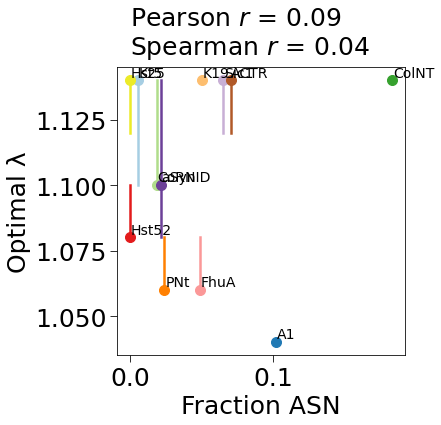

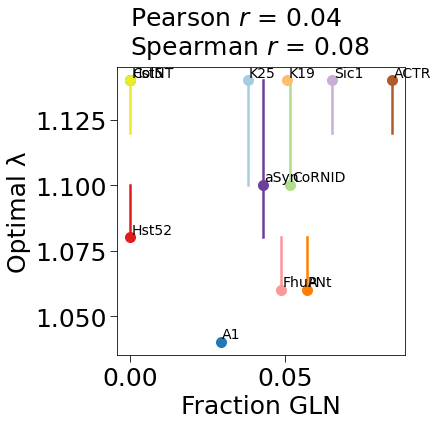

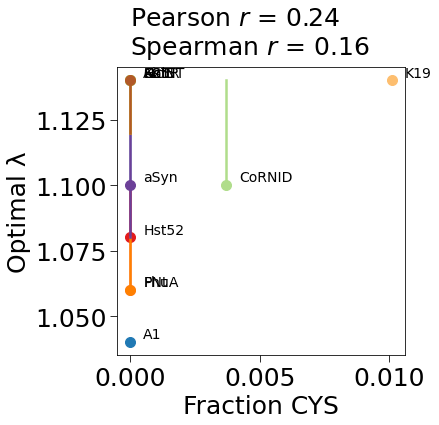

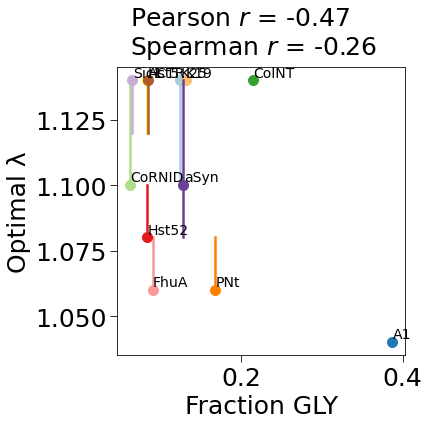

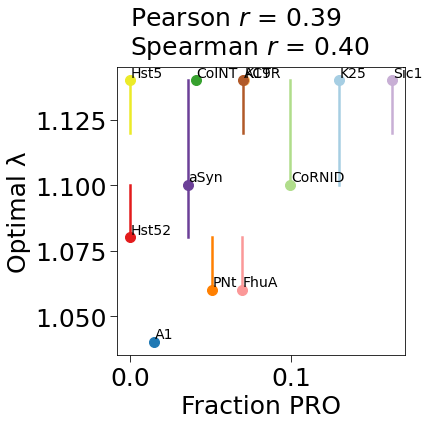

In [49]:
pearson_vs_AA = []
spearman_vs_AA = []

for AA in AAs:
    fig= plt.figure(figsize=(4,4))
    axes= fig.add_axes([1,1,1,1])
    
    plt.xlabel(f'Fraction {AA}', fontsize=25)
    plt.ylabel('Optimal λ', fontsize=25)

    plt.tick_params(colors='black', direction='out', length=7, labelsize=25)

    fraction_AA_vs_protein = []

    for i,protein in enumerate(proteins):
        #Get nr of residue types
        nr_AA = np.count_nonzero(np.isin(sequences[protein], AA))
        fraction_AA = nr_AA/len(sequences[protein])

        #Append to list
        fraction_AA_vs_protein.append(fraction_AA)
        
        #Plot data point
        plt.plot(fraction_AA, lambda_mins_chi2[i], 'o', color=colors[i], markersize=10, label=str(protein))
        plt.plot((fraction_AA,fraction_AA),(np.amin(lambda_mins_chi2range[i]),np.amax(lambda_mins_chi2range[i])),c=colors[i],lw=2.5)
        plt.text(fraction_AA+0.0005, lambda_mins_chi2[i]+0.003, str(protein), fontsize=14, horizontalalignment='left', verticalalignment='center')

    pearson, pval_pearson = stats.pearsonr(fraction_AA_vs_protein,lambda_mins_chi2)
    pearson_vs_AA.append(pearson)

    spearman, pval_spearman = stats.spearmanr(fraction_AA_vs_protein,lambda_mins_chi2)
    spearman_vs_AA.append(spearman)

    plt.text(np.amin(fraction_AA_vs_protein), 1.15, 'Pearson $\it{r}$ = %2.2f \nSpearman $\it{r}$ = %2.2f' % (pearson, spearman), fontsize=25)

    fig.savefig(f"figures/fraction_{AA}_vs_lambdaoptSAXSrange.png", bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig(f"figures/fraction_{AA}_vs_lambdaoptSAXSrange.pdf", bbox_inches='tight', pad_inches=1, dpi=400)    

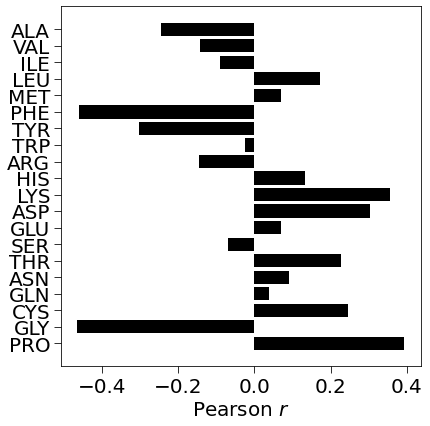

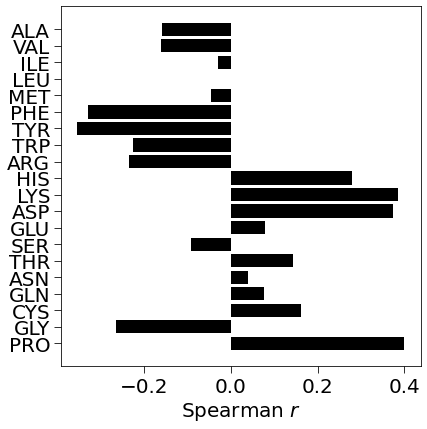

In [50]:
#Plot pearson r for each bead type combination
fig= plt.figure(figsize=(5,5))
axes= fig.add_axes([1,1,1,1])

plt.barh(AAs[::-1], pearson_vs_AA[::-1], align='center', color='black')

plt.xlabel('Pearson ${r}$', fontsize=20)

plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/AA_pearsoncorrelationsSAXS.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/AA_pearsoncorrelationsSAXS.pdf", bbox_inches='tight', pad_inches=1, dpi=400)


#Plot spearman r for each bead type combination
fig= plt.figure(figsize=(5,5))
axes= fig.add_axes([1,1,1,1])

plt.barh(AAs[::-1], spearman_vs_AA[::-1], align='center', color='black')

plt.xlabel('Spearman ${r}$', fontsize=20)

plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/AA_spearmancorrelationsSAXS.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/AA_spearmancorrelationsSAXS.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Rg vs lambda to test SS, PME, and box-size effect

In [5]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#ECEC28','#B15928']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,12))

proteins = ['Hst5','Hst5_PME','aSyn','aSyn_PME','aSyn_bigboxtest','ACTR','ACTR_helices']
protein_figure_name = ['Hst5','Hst5 PME','aSyn','aSyn PME','aSyn big box','ACTR','ACTR helix dihedrals']
lambdas = ['1.00', '1.04', '1.06', '1.08', '1.10', '1.12', '1.14']
lambdas_float = [1.0, 1.04, 1.06, 1.08, 1.10, 1.12, 1.14]
PI_distance_cutoff = 1.1
errmethod='hline' #Choose b3, hline or knee_loc

#Dictionary with protein:[exp_Rg, exp_err]
#exp_Rg = {'Hst5':[1.34, 0.05],'Hst5_PME':[1.34, 0.05],'aSyn':[3.56, 0.036],'aSyn_PME':[3.56, 0.036], 'aSyn_bigboxtest':[3.56, 0.036]}
exp_Rg = {'Hst5':[1.34, 0.05],'Hst5_PME':[1.34, 0.05],'aSyn':[3.56, 0.036],'aSyn_PME':[3.56, 0.036], 'aSyn_bigboxtest':[3.56, 0.036], 'ACTR':[2.55, 0.27], 'ACTR_helices':[2.55, 0.27]}

#Dictionary with protein lengths
nr_residues = {'Hst5':24, 'Hst5_PME':24, 'aSyn':140, 'aSyn_PME':140, 'aSyn_bigboxtest':140, 'ACTR':71, 'ACTR_helices':71}

#Dictionary with simulation/experiment temperatures
temperature = {'Hst5':293, 'Hst5_PME':293, 'aSyn':293, 'aSyn_PME':293, 'aSyn_bigboxtest':140, 'ACTR':278, 'ACTR_helices':278}


/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/IDP/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1

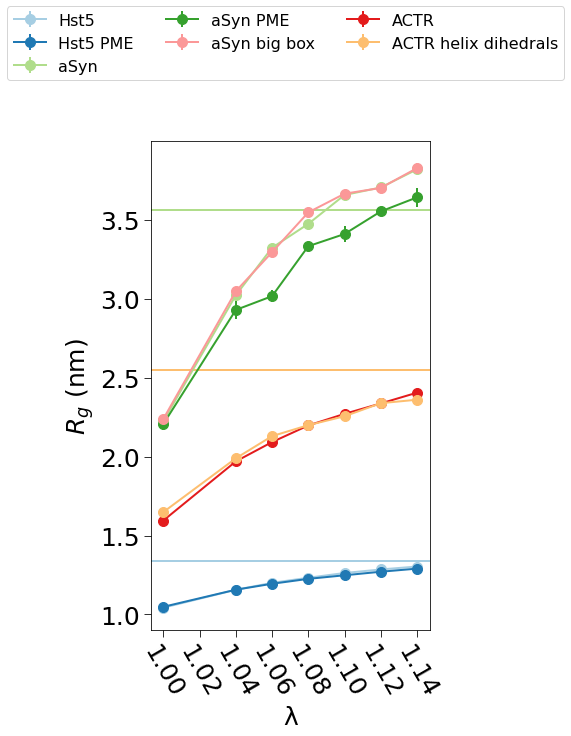

In [6]:
fig = plt.figure(figsize=(5,9))    

x_ticks = np.arange(1.00, 1.16, step=0.02)
mean_square_error = 0
chi2 = 0
lambda_mins = []
Rg_square_error_vs_protein = []
Rg_square_error_norm_vs_protein = []
Rg_chi2_vs_protein = []

#Loop over all proteins
for i,protein in enumerate(proteins):
    
    Rg_vs_lambda = []
    Rgerr_vs_lambda = []
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Load traj
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)
        Rg_avg = np.average(Rg)
        #Calculate Rg
        Rg_vs_lambda.append(Rg_avg)
        
        #Block error analysis
        blocks_stat = block.blocking(Rg)
        if errmethod != 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
        elif errmethod == 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
            
        Rgerr_vs_lambda.append(err)
    
    #Calculate square-error of each Rg to experimental, find minimum distance and get corresponding lambda value
    Rg_vs_lambda = np.array(Rg_vs_lambda)
    Rg_square_error = np.square(Rg_vs_lambda-exp_Rg[protein][0])
    Rg_square_error_norm = Rg_square_error/exp_Rg[protein][0]
    Rg_chi2 = np.square((Rg_vs_lambda-exp_Rg[protein][0])/exp_Rg[protein][1])
    
    lambda_mins.append(lambdas_float[np.argmin(Rg_square_error)])
    Rg_square_error_vs_protein.append(Rg_square_error)
    Rg_chi2_vs_protein.append(Rg_chi2)
    Rg_square_error_norm_vs_protein.append(Rg_square_error_norm)
    
    #Add square_error vs lambda to running sum for averaging
    mean_square_error += Rg_square_error
    chi2 += Rg_chi2
    
    plt.errorbar(lambdas_float, Rg_vs_lambda, yerr=Rgerr_vs_lambda, fmt='-o', linewidth=2, markersize=10, color=colors[i], label=protein_figure_name[i])
    if 'PME' not in protein and 'bigbox' not in protein:
        plt.axhline(exp_Rg[protein][0], linewidth=2, color=colors[i])
    
#ax[int(len(proteins)/4)-1,3].legend(fontsize=15, loc='lower right')
fig.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=3)

plt.xticks(x_ticks)
plt.xlabel('λ', fontsize=25)
plt.ylabel('$\it{R}$$_g$ (nm)', fontsize=25)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)

#Calculate mean-square-error over all proteins for each lambda
mean_square_error=mean_square_error/len(proteins)
chi2=chi2/len(proteins)

fig.savefig("figures/Rg_vs_lambda_oneplot_testsystems.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_vs_lambda_oneplot_testsystems.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

{'Hst5_PME': [14.573176159688959, 5.26477668680192, 3.332726274919315, 2.386912294044008, 1.8417655785603795, 1.4761647527452693, 1.2947213638386041], 'aSyn_PME': [11.137390852582229, 4.316785602007018, 7.54560346076999, 6.890679145607638, 6.814917432094648, 4.896112474095041, 4.690047836300099], 'aSyn_bigboxtest': [22.930006333703712, 4.00797086607298, 1.8920058895648666, 1.0834170819501607, 1.1048116163416188, 1.2724081187295437, 1.4260687008079536], 'ACTR_helices': [3.055408759781594, 1.6629697985028005, 1.3641783866059507, 1.2657208213108002, 1.1975270968583092, 1.1158246219089514, 1.1115387383931323]}


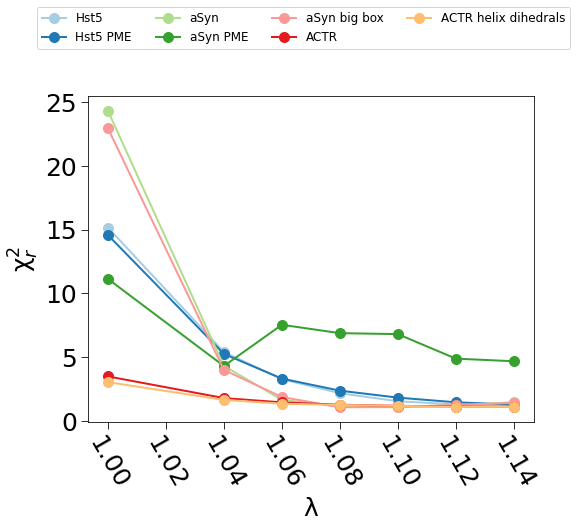

In [7]:
## Chi2 to SAXS

#Load chi2 pickle of normal IDP systems
with open('martini3saxs_idp.pkl', "rb") as f:
    SAXSchi2_vs_proteins = pickle.load(f)
#SAXSchi2_vs_proteins=SAXSchi2_vs_proteins.drop(columns=['TIA1', 'hSUMO_hnRNPA1','hnRNPA1'])

#Load chi2 of other test IDP systems
l, chi2 = np.genfromtxt('control_systems_SAXS_martini3saxs.dat', usecols=(1,2), unpack=True)
protein_name = ['Hst5_PME','aSyn_PME','aSyn_bigboxtest','ACTR_helices']
protein_name_file = np.genfromtxt('control_systems_SAXS_martini3saxs.dat', usecols=(0), unpack=True, dtype=str)

#Reformat to dictionary
chi2_vs_lambda_vs_protein = {}
for protein in protein_name:
    chi2_vs_lambda = []
    for i,name in enumerate(protein_name_file):
        if name==protein:
            chi2_vs_lambda.append(chi2[i])
    chi2_vs_lambda_vs_protein[protein] = chi2_vs_lambda

print(chi2_vs_lambda_vs_protein)

#Plot

#Set x-ticks
x_ticks = np.arange(1.00, 1.16, step=0.02)

#Start plot
fig = plt.figure(figsize=(8,6))
plt.xlabel('λ', fontsize=25)
plt.ylabel('χ$^{2}_r$', fontsize=25)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)
plt.xticks(x_ticks)
#plt.yscale('log')

#Loop through proteins and plot
for i,protein in enumerate(proteins):
    if protein not in protein_name:
        plt.plot(lambdas_float, SAXSchi2_vs_proteins[protein], '-o', linewidth=2, markersize=10, color=colors[i], label=protein_figure_name[i])
    if protein in protein_name:
        plt.plot(lambdas_float, chi2_vs_lambda_vs_protein[protein], '-o', linewidth=2, markersize=10, color=colors[i], label=protein_figure_name[i])

fig.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=4)

fig.savefig("figures/SAXS_Chi2_vs_lambda_oneplot_testsystems.png", bbox_inches='tight', pad_inches=1, dpi=300)
fig.savefig("figures/SAXS_Chi2_vs_lambda_oneplot_testsystems.pdf", bbox_inches='tight', pad_inches=1, dpi=300)

# Select K25 frames for figure 1a

In [54]:
for l in ['1.00','1.10','1.12']:
    time, Rg = np.genfromtxt(f'K25/lambda_{l}/Rg_gyrate.xvg', usecols=(0,1), skip_header=27, unpack=True)
    average_Rg = np.average(Rg)
    MSE_Rg = np.square(Rg-average_Rg)
    frame_index = np.argmin(MSE_Rg)
    traj = md.load(f'K25/lambda_{l}/prodrun_nopbc.xtc', top=f'K25/PRO_CG.gro')
    frame = traj[frame_index]
    frame.save_pdb(f'K25/K25_frame_averageRg_lambda{l}.pdb')
    

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (ALA, MET)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (GLU, ALA)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (PRO, GLU)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consec